# Q1_2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq


In [2]:
# import parquet file 
df =pd.read_parquet('set-abc.parquet', engine='pyarrow')

FileNotFoundError: [Errno 2] No such file or directory: 'set-abc.parquet'

In [ ]:
static_variables = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']
if 'ICUType' in df.columns:
    static_variables.remove('ICUType')
static_variables_we_want = ['Age', 'Gender', 'Height', 'Weight']
all_variables = ['Weight', 'Age', 'TroponinI', 'DiasABP', 'MechVent', 'HCO3', 'Cholesterol', 'HCT', 'SaO2', 'WBC', 'SysABP', 'Urine', 'ICUType', 'Gender', 'ALP', 'Creatinine', 'K', 'AST', 'Glucose', 'RespRate', 'MAP', 'FiO2', 'BUN', 'Na', 'Bilirubin', 'TroponinT', 'PaCO2', 'Height', 'GCS', 'HR', 'pH', 'PaO2', 'Lactate', 'ALT', 'NISysABP', 'RecordID', 'Platelets', 'Temp', 'Mg', 'NIDiasABP', 'Albumin', 'NIMAP']
dyn_variables = [x for x in all_variables if x not in static_variables]
dyn_variables.append('Weight_VAR')
len(dyn_variables), len(static_variables_we_want)

(37, 4)

In [5]:
static_df = df[static_variables_we_want+['RecordID']].drop_duplicates().reset_index(drop=True)
static_df

Age  Gender  Height  Weight  RecordID
0      54.0     0.0    -1.0    -1.0  132539.0
1      76.0     1.0   175.3    76.0  132540.0
2      44.0     0.0    -1.0    56.7  132541.0
3      68.0     1.0   180.3    84.6  132543.0
4      88.0     0.0    -1.0    -1.0  132545.0
...     ...     ...     ...     ...       ...
11995  61.0     0.0   172.7    85.0  163029.0
11996  51.0     0.0    -1.0   208.0  163033.0
11997  60.0     0.0   172.7    85.0  163034.0
11998  71.0     1.0    -1.0   128.0  163035.0
11999  74.0     0.0    -1.0    73.1  163037.0

[12000 rows x 5 columns]

In [6]:
#  open outcomes.csv file
outcomes = pd.read_csv('outcomes.csv')
outcomes

RecordID  In-hospital_death
0        132539                  0
1        132540                  0
2        132541                  0
3        132543                  0
4        132545                  0
...         ...                ...
11995    163029                  0
11996    163033                  0
11997    163034                  0
11998    163035                  0
11999    163037                  0

[12000 rows x 2 columns]

In [7]:
static_df = static_df.merge(outcomes, on='RecordID', how='left')
static_df

Age  Gender  Height  Weight  RecordID  In-hospital_death
0      54.0     0.0    -1.0    -1.0  132539.0                  0
1      76.0     1.0   175.3    76.0  132540.0                  0
2      44.0     0.0    -1.0    56.7  132541.0                  0
3      68.0     1.0   180.3    84.6  132543.0                  0
4      88.0     0.0    -1.0    -1.0  132545.0                  0
...     ...     ...     ...     ...       ...                ...
11995  61.0     0.0   172.7    85.0  163029.0                  0
11996  51.0     0.0    -1.0   208.0  163033.0                  0
11997  60.0     0.0   172.7    85.0  163034.0                  0
11998  71.0     1.0    -1.0   128.0  163035.0                  0
11999  74.0     0.0    -1.0    73.1  163037.0                  0

[12000 rows x 6 columns]

Text(0.5, 1.0, 'In-hospital_death distribution')

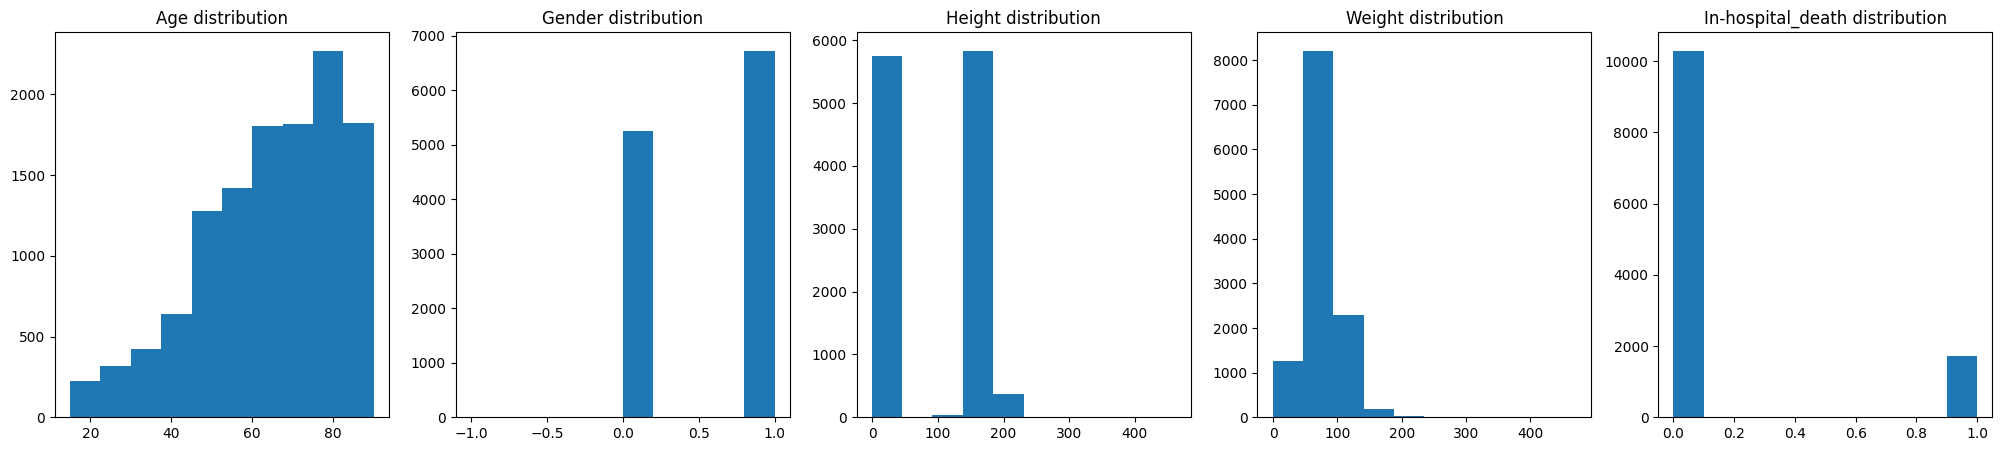

In [8]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.hist(static_df['Age'])
plt.title('Age distribution')

plt.subplot(1,5,2)
plt.hist(static_df['Gender'])
plt.title('Gender distribution')

plt.subplot(1,5,3)
plt.hist(static_df['Height'])
plt.title('Height distribution')

plt.subplot(1,5,4)
plt.hist(static_df['Weight'])
plt.title('Weight distribution')

plt.subplot(1,5,5)
plt.hist(static_df['In-hospital_death'])
plt.title('In-hospital_death distribution')

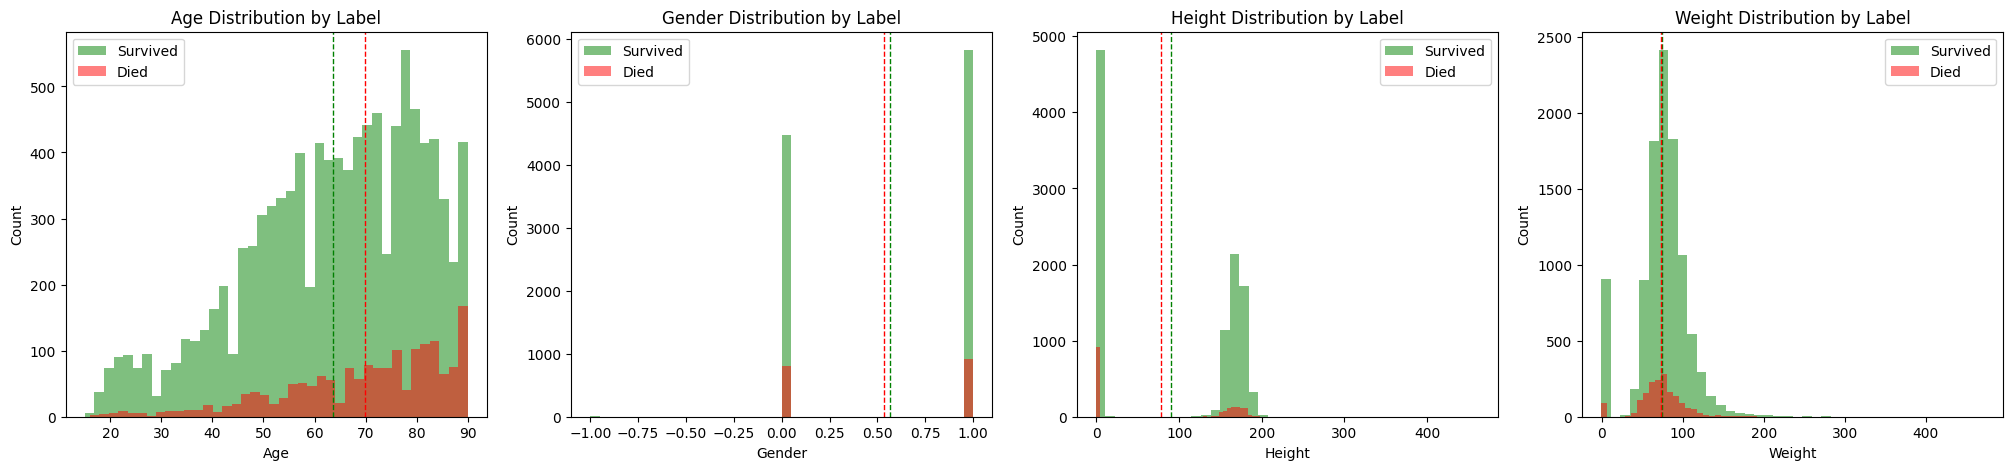

In [9]:
plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Age'], bins=40, alpha=0.5, color='green', label="Survived")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Age'], bins=40, alpha=0.5, color='red', label="Died")

# add vertical line for mean for each group
plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Age'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Age'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Age Distribution by Label')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,4,2)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Gender'], bins=40, alpha=0.5, color='green', label="Survived")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Gender'], bins=40, alpha=0.5, color='red', label="Died")

plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Gender'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Gender'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title('Gender Distribution by Label')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,4,3)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Height'], bins=40, alpha=0.5, color='green', label="Survived")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Height'], bins=40, alpha=0.5, color='red', label="Died")

plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Height'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Height'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title('Height Distribution by Label')
plt.xlabel('Height')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,4,4)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Weight'], bins=40, alpha=0.5, color='green', label="Survived")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Weight'], bins=40, alpha=0.5, color='red', label="Died")

plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Weight'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Weight'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title('Weight Distribution by Label')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend()




In [10]:
dyn_df = df[['RecordID'] + dyn_variables]
dyn_df

dyn_df = dyn_df.merge(outcomes, on='RecordID', how='left')



In [11]:
dyn_df

RecordID  TroponinI  DiasABP  MechVent  HCO3  Cholesterol   HCT  SaO2   
0       132539.0        NaN      NaN       NaN   NaN          NaN   NaN   NaN  \
1       132539.0        NaN      NaN       NaN   NaN          NaN   NaN   NaN   
2       132539.0        NaN      NaN       NaN   NaN          NaN   NaN   NaN   
3       132539.0        NaN      NaN       NaN   NaN          NaN   NaN   NaN   
4       132539.0        NaN      NaN       NaN   NaN          NaN  33.7   NaN   
...          ...        ...      ...       ...   ...          ...   ...   ...   
587995  163037.0        NaN     51.0       NaN   NaN          NaN   NaN   NaN   
587996  163037.0        NaN      NaN       NaN   NaN          NaN   NaN   NaN   
587997  163037.0        NaN     56.0       1.0   NaN          NaN   NaN   NaN   
587998  163037.0        NaN     50.0       NaN   NaN          NaN   NaN   NaN   
587999  163037.0        NaN     47.0       NaN   NaN          NaN   NaN   NaN   

        WBC  SysABP  ...  ALT  NISysABP  Platelets   Temp  Mg  NIDiasABP   
0       NaN     NaN  ...  NaN       NaN        NaN    NaN NaN        NaN  \
1       NaN     NaN  ...  NaN     152.0        NaN  35.35 NaN       61.5   
2       NaN     NaN  ...  NaN     137.0        NaN    NaN NaN       62.0   
3       NaN     NaN  ...  NaN     123.0        NaN    NaN NaN       52.0   
4       NaN     NaN  ...  NaN     114.0        NaN  37.80 NaN       52.0   
...     ...     ...  ...  ...       ...        ...    ...  ..        ...   
587995  NaN   122.0  ...  NaN     108.0        NaN    NaN NaN       55.0   
587996  NaN     NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   
587997  NaN   147.0  ...  NaN      95.0        NaN  37.30 NaN       51.0   
587998  NaN    90.0  ...  NaN       NaN        NaN    NaN NaN        NaN   
587999  NaN    99.0  ...  NaN       NaN        NaN    NaN NaN        NaN   

        Albumin   NIMAP  Weight_var  In-hospital_death  
0           NaN     NaN         NaN                  0  
1           NaN  91.665         NaN                  0  
2           NaN  87.000         NaN                  0  
3           NaN  75.670         NaN                  0  
4           NaN  72.670         NaN                  0  
...         ...     ...         ...                ...  
587995      NaN  67.000         NaN                  0  
587996      NaN     NaN         NaN                  0  
587997      NaN  61.000         NaN                  0  
587998      NaN     NaN         NaN                  0  
587999      NaN     NaN         NaN                  0  

[588000 rows x 39 columns]

In [12]:
# group by RecordID and calculate the mean of each variable
mean_dyn_df = dyn_df.groupby('RecordID').mean().reset_index()
mean_dyn_df

RecordID  TroponinI    DiasABP  MechVent       HCO3  Cholesterol   
0      132539.0        NaN        NaN       NaN  27.000000          NaN  \
1      132540.0        NaN  58.448148       1.0  22.333333          NaN   
2      132541.0        NaN  67.666667       1.0  25.000000          NaN   
3      132543.0        NaN        NaN       NaN  27.666667          NaN   
4      132545.0        NaN        NaN       NaN  19.000000          NaN   
...         ...        ...        ...       ...        ...          ...   
11995  163029.0        NaN  59.099206       1.0  26.666667          NaN   
11996  163033.0        NaN  49.000000       NaN  33.500000          NaN   
11997  163034.0        NaN  54.870370       1.0  25.250000          NaN   
11998  163035.0        NaN  70.271825       NaN  22.166667          NaN   
11999  163037.0        NaN  59.153846       1.0  17.200000        143.0   

             HCT       SaO2        WBC      SysABP  ...    ALT    NISysABP   
0      32.500000        NaN  10.300000         NaN  ...    NaN  113.242424  \
1      28.655556  96.833333  11.266667  116.051852  ...    NaN  113.694444   
2      28.460000  95.000000   4.700000  126.500000  ...   83.0  132.421875   
3      37.442857        NaN   9.400000         NaN  ...   12.0  120.431159   
4      29.550000        NaN   4.300000         NaN  ...    NaN  132.808333   
...          ...        ...        ...         ...  ...    ...         ...   
11995  27.066667        NaN   8.200000  135.437698  ...    NaN         NaN   
11996  48.050000        NaN   5.150000   93.937500  ...    NaN  134.846154   
11997  25.685714  98.000000   5.875000  114.809259  ...    NaN   98.500000   
11998  30.725000  99.000000  24.085714  120.722222  ...  451.5   72.250000   
11999  30.875000        NaN  14.225000  100.846154  ...   20.5  102.862637   

        Platelets       Temp        Mg  NIDiasABP  Albumin      NIMAP   
0      203.000000  37.511538  1.700000  49.803030      NaN  70.949848  \
1      178.600000  37.138571  2.300000  57.111111      NaN  75.971667   
2       89.666667  37.800000  1.720000  78.963542     2.50  96.780573   
3      330.000000  36.223077  2.033333  63.853261     4.40  82.712799   
4      103.000000  36.880000  1.550000  45.962500     3.30  74.911875   
...           ...        ...       ...        ...      ...        ...   
11995  199.000000  37.269231  2.166667        NaN     3.15        NaN   
11996  155.000000  37.220000  1.800000  73.307692      NaN  93.817692   
11997   91.600000  37.952941  1.820000  47.500000      NaN  64.500000   
11998   43.750000  35.845000  2.283333  37.500000      NaN  65.668889   
11999  241.500000  37.554167  2.071429  54.149267     3.50  65.606227   

       Weight_var  In-hospital_death  
0             NaN                0.0  
1       80.841379                0.0  
2       56.700000                0.0  
3       84.600000                0.0  
4             NaN                0.0  
...           ...                ...  
11995         NaN                0.0  
11996         NaN                0.0  
11997   93.000000                0.0  
11998  128.306977                0.0  
11999         NaN                0.0  

[12000 rows x 39 columns]

## Mean distribution

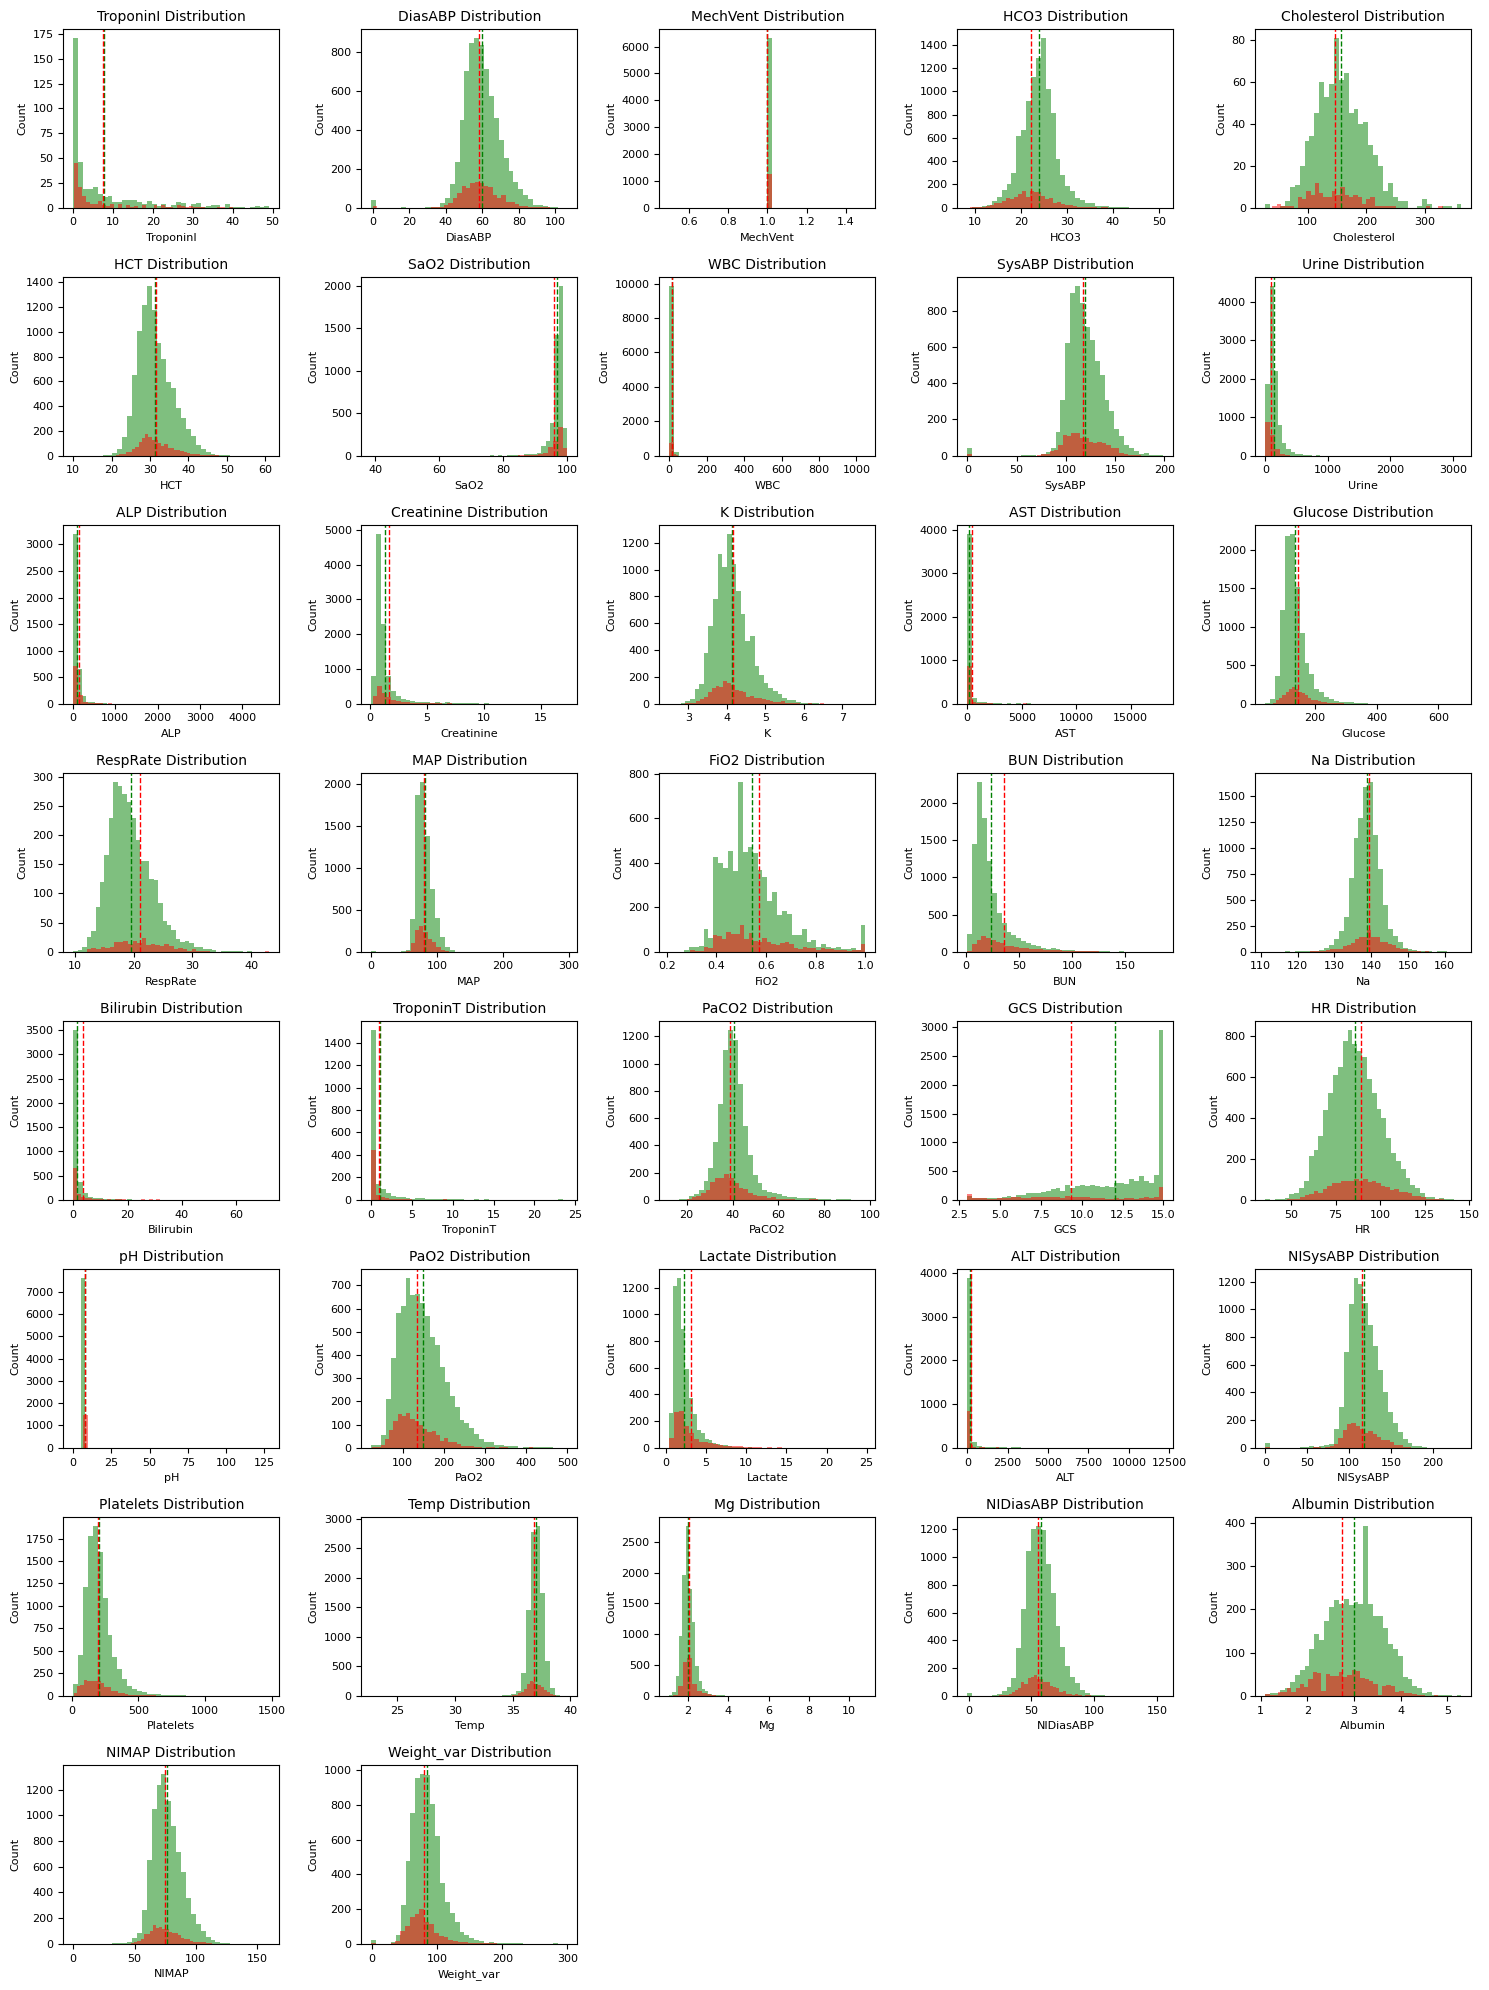

In [13]:
fig, axes = plt.subplots(8, 5, figsize=(15, 20))  # Increase figure size

for i in range(37):
    row = i // 5
    col = i % 5
    ax = axes[row, col]  

    ax.hist(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 0][dyn_variables[i]], bins=40, alpha=0.5, color='green', label="Survived")
    ax.hist(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 1][dyn_variables[i]], bins=40, alpha=0.5, color='red', label="Died")

    #  add vertical line for mean for each group
    ax.axvline(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 0][dyn_variables[i]].mean(), color='green', linestyle='dashed', linewidth=1)
    ax.axvline(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 1][dyn_variables[i]].mean(), color='red', linestyle='dashed', linewidth=1)
    
    ax.set_title(f'{dyn_variables[i]} Distribution', fontsize=10)  
    ax.set_xlabel(dyn_variables[i], fontsize=8) 
    ax.set_ylabel('Count', fontsize=8)
    ax.tick_params(axis='both', labelsize=8)  

# remove empty subplots 
for i in range(37, 40):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Optimize spacing
plt.show()


## Variance distribution

In [14]:
# compute variance for each variable grouped by RecordID in dyn_df
var_dyn_df = dyn_df.groupby(['RecordID','In-hospital_death']).var().reset_index()

var_dyn_df['In-hospital_death'].unique()

array([0, 1], dtype=int64)

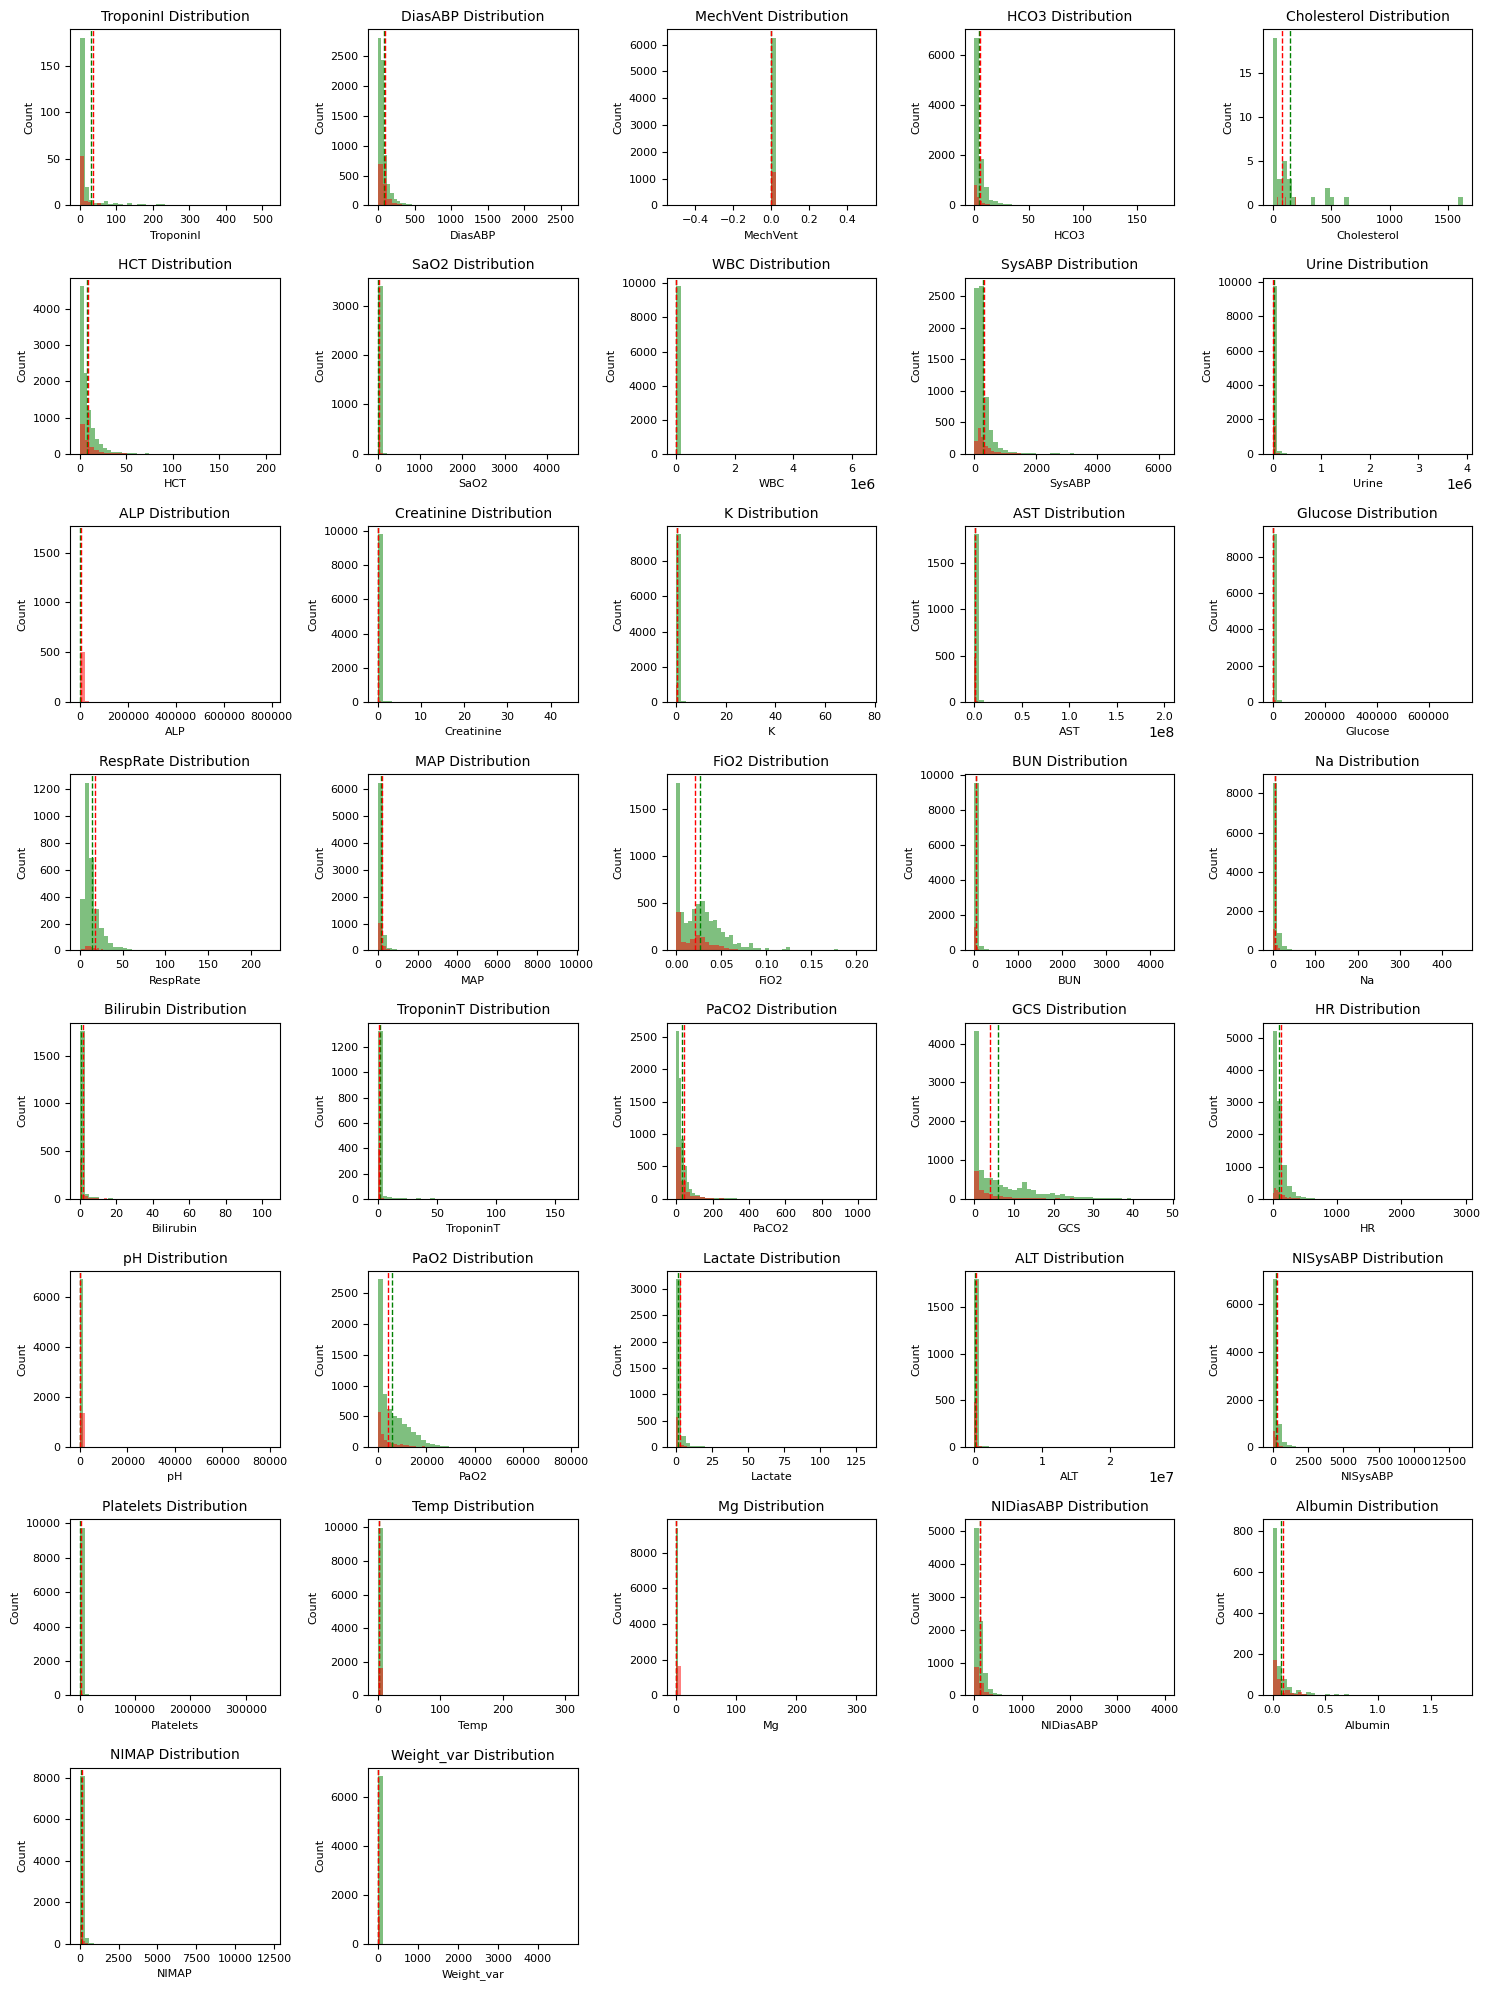

In [15]:
fig, axes = plt.subplots(8, 5, figsize=(15, 20))  # Increase figure size

for i in range(37):
    row = i // 5
    col = i % 5
    ax = axes[row, col]  

    ax.hist(var_dyn_df[var_dyn_df['In-hospital_death'] == 0][dyn_variables[i]], bins=40, alpha=0.5, color='green', label="Survived")
    ax.hist(var_dyn_df[var_dyn_df['In-hospital_death'] == 1][dyn_variables[i]], bins=40, alpha=0.5, color='red', label="Died")

    #  add vertical line for mean for each group
    ax.axvline(var_dyn_df[var_dyn_df['In-hospital_death'] == 0][dyn_variables[i]].mean(), color='green', linestyle='dashed', linewidth=1)
    ax.axvline(var_dyn_df[var_dyn_df['In-hospital_death'] == 1][dyn_variables[i]].mean(), color='red', linestyle='dashed', linewidth=1)
    
    ax.set_title(f'{dyn_variables[i]} Distribution', fontsize=10)  
    ax.set_xlabel(dyn_variables[i], fontsize=8) 
    ax.set_ylabel('Count', fontsize=8)
    ax.tick_params(axis='both', labelsize=8)  

# remove empty subplots 
for i in range(37, 40):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Optimize spacing
plt.show()


## Correlation btw variables

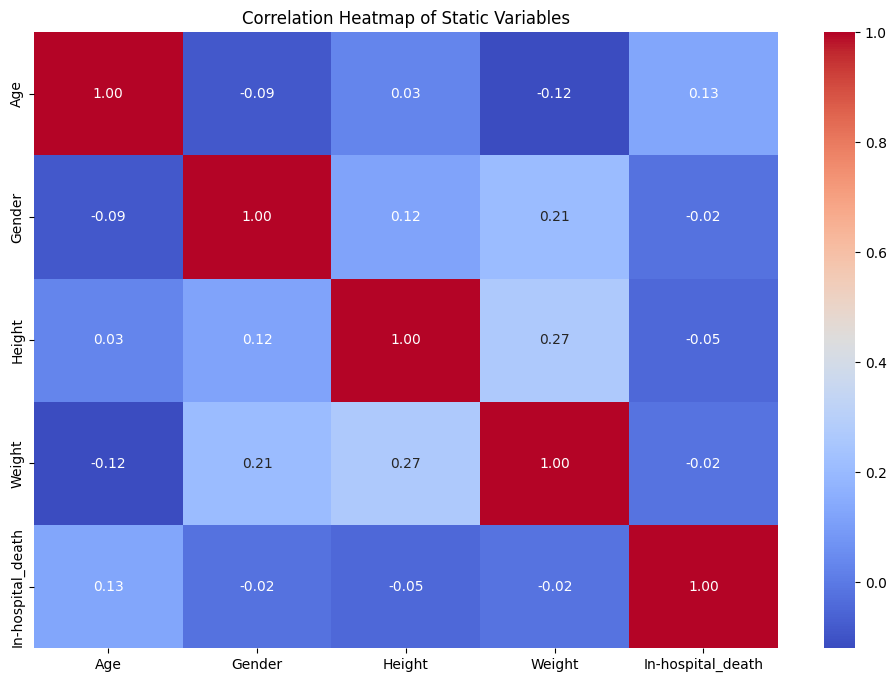

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(static_df.drop(columns=['RecordID']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Static Variables")
plt.show()


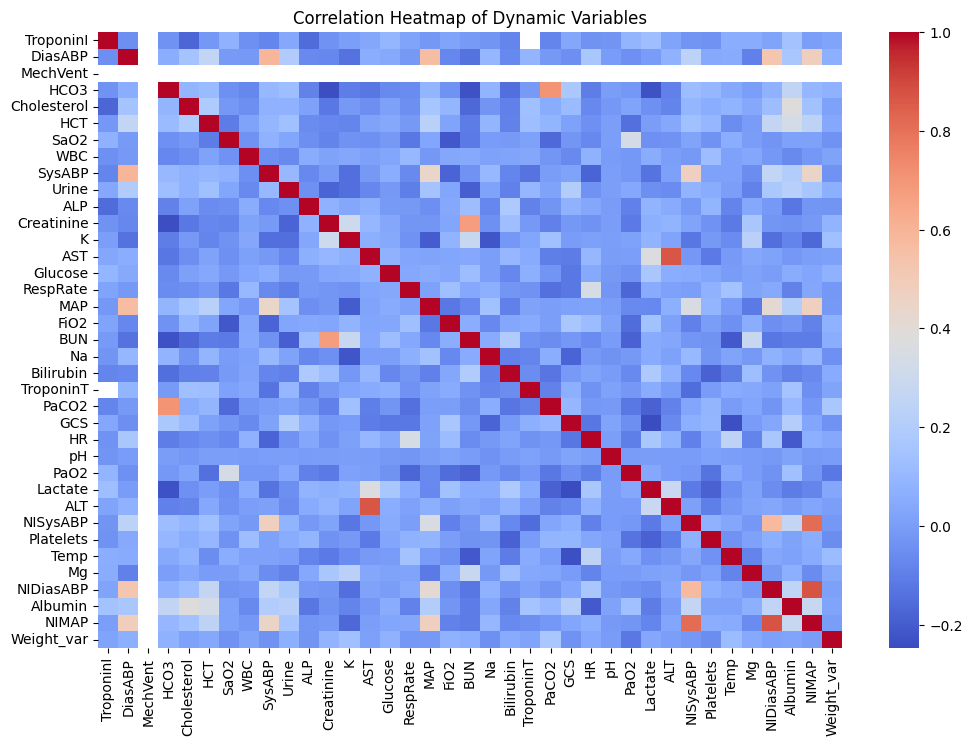

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(mean_dyn_df.drop(columns=['RecordID', 'In-hospital_death']).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Dynamic Variables")
plt.show()


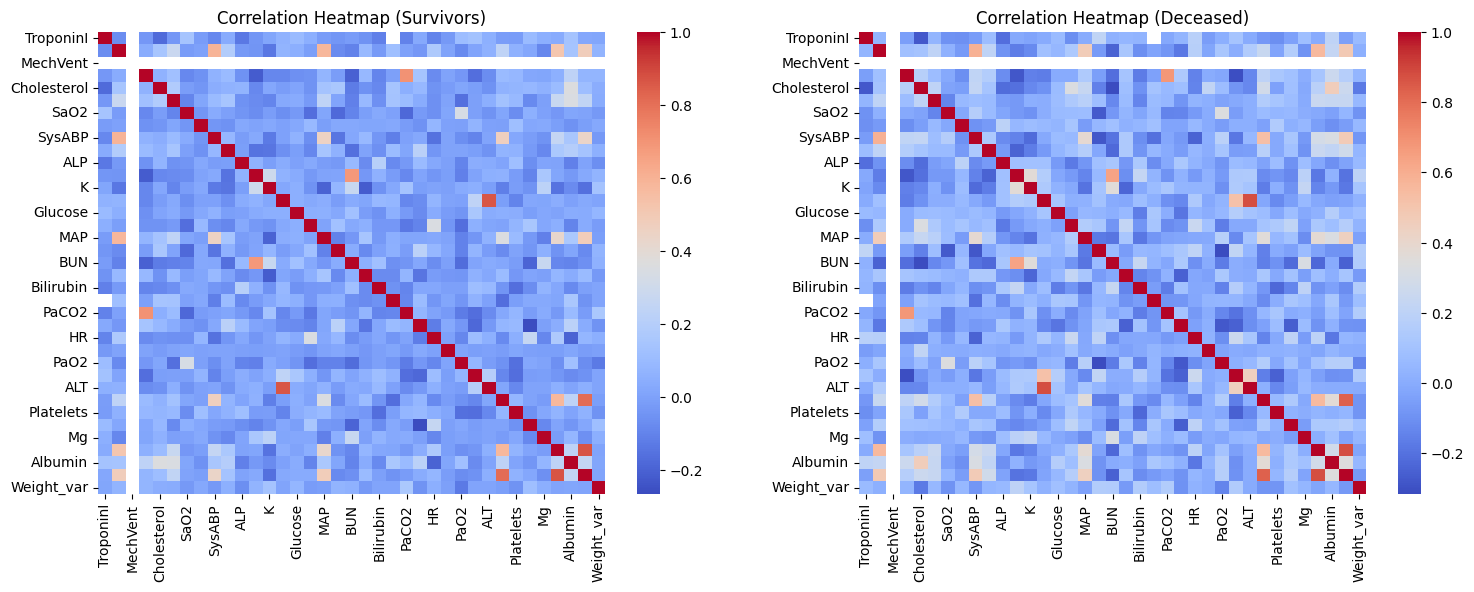

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# correl for survivors
sns.heatmap(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 0].drop(columns=['RecordID', 'In-hospital_death']).corr(),
            cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation Heatmap (Survivors)")

# correl for deceased patients
sns.heatmap(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 1].drop(columns=['RecordID', 'In-hospital_death']).corr(),
            cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Heatmap (Deceased)")

plt.show()


## Time evolution of variables 

In [18]:
# df merge with outcomes 
df = df.merge(outcomes, on='RecordID', how='left')
df

RecordID   Age  Gender  Height  Weight  Timestamp  TroponinI  DiasABP   
0       132539.0  54.0     0.0    -1.0    -1.0        0.0        NaN      NaN  \
1       132539.0  54.0     0.0    -1.0    -1.0        1.0        NaN      NaN   
2       132539.0  54.0     0.0    -1.0    -1.0        2.0        NaN      NaN   
3       132539.0  54.0     0.0    -1.0    -1.0        3.0        NaN      NaN   
4       132539.0  54.0     0.0    -1.0    -1.0        4.0        NaN      NaN   
...          ...   ...     ...     ...     ...        ...        ...      ...   
587995  163037.0  74.0     0.0    -1.0    73.1       44.0        NaN     51.0   
587996  163037.0  74.0     0.0    -1.0    73.1       45.0        NaN      NaN   
587997  163037.0  74.0     0.0    -1.0    73.1       46.0        NaN     56.0   
587998  163037.0  74.0     0.0    -1.0    73.1       47.0        NaN     50.0   
587999  163037.0  74.0     0.0    -1.0    73.1       48.0        NaN     47.0   

        MechVent  HCO3  ...  ALT  NISysABP  Platelets   Temp  Mg  NIDiasABP   
0            NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN  \
1            NaN   NaN  ...  NaN     152.0        NaN  35.35 NaN       61.5   
2            NaN   NaN  ...  NaN     137.0        NaN    NaN NaN       62.0   
3            NaN   NaN  ...  NaN     123.0        NaN    NaN NaN       52.0   
4            NaN   NaN  ...  NaN     114.0        NaN  37.80 NaN       52.0   
...          ...   ...  ...  ...       ...        ...    ...  ..        ...   
587995       NaN   NaN  ...  NaN     108.0        NaN    NaN NaN       55.0   
587996       NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   
587997       1.0   NaN  ...  NaN      95.0        NaN  37.30 NaN       51.0   
587998       NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   
587999       NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   

        Albumin   NIMAP  Weight_var  In-hospital_death  
0           NaN     NaN         NaN                  0  
1           NaN  91.665         NaN                  0  
2           NaN  87.000         NaN                  0  
3           NaN  75.670         NaN                  0  
4           NaN  72.670         NaN                  0  
...         ...     ...         ...                ...  
587995      NaN  67.000         NaN                  0  
587996      NaN     NaN         NaN                  0  
587997      NaN  61.000         NaN                  0  
587998      NaN     NaN         NaN                  0  
587999      NaN     NaN         NaN                  0  

[588000 rows x 44 columns]

In [19]:

plt.figure(figsize=(10, 5))  # Set figure size



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

C:\Users\thoma\AppData\Local\Temp\ipykernel_18632\601519748.py:22: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim(y_min, y_max)
C:\Users\thoma\AppData\Local\Temp\ipykernel_18632\601519748.py:35: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim(y_min, y_max)
C:\Users\thoma\AppData\Local\Temp\ipykernel_18632\601519748.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create two side-by-side plots


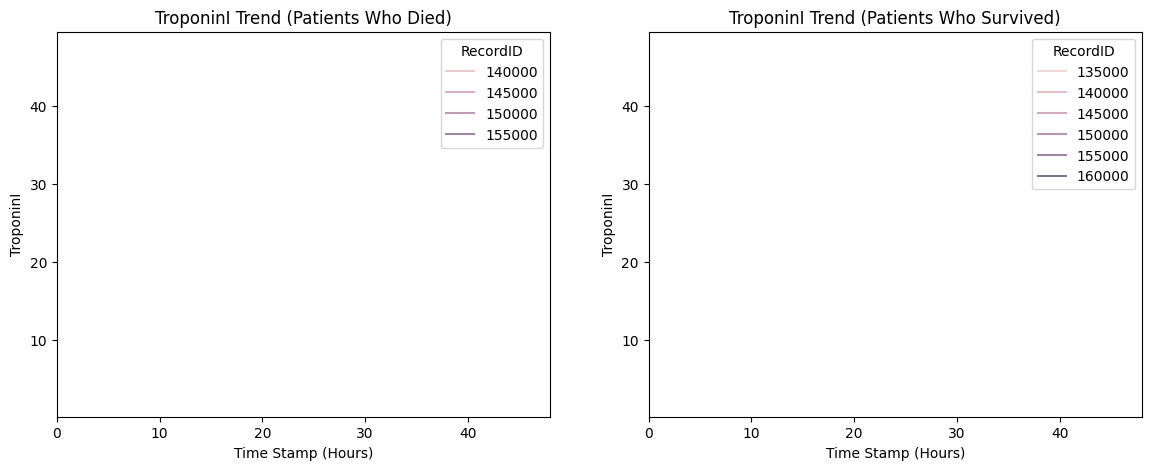

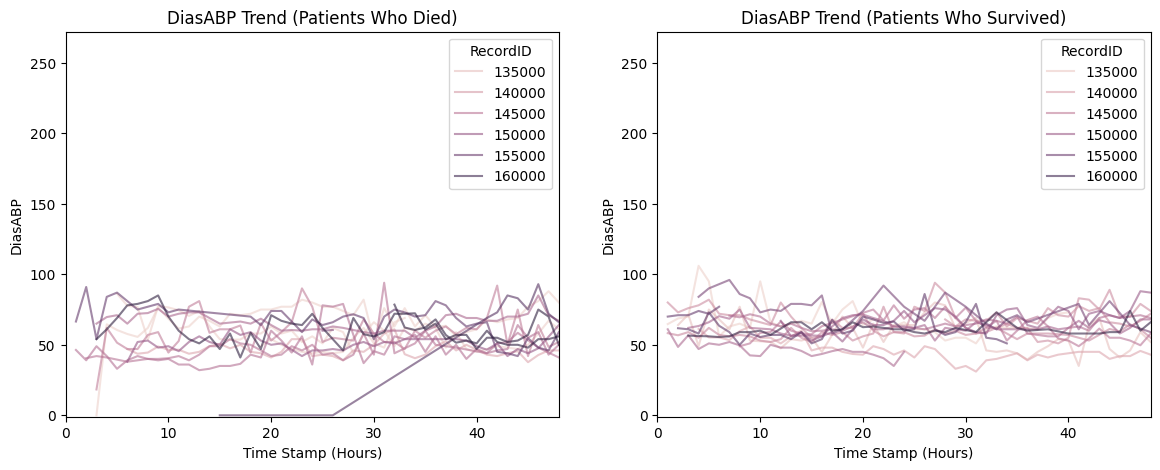

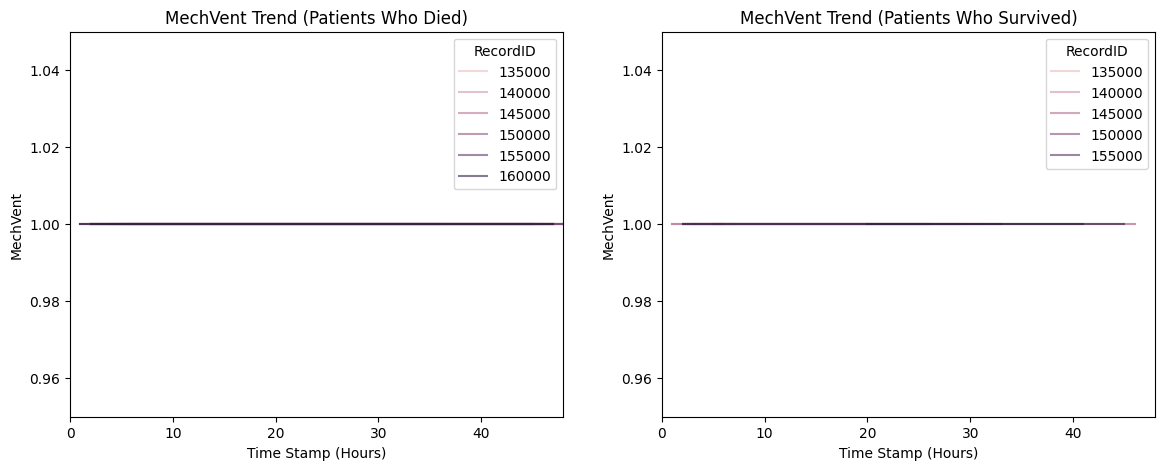

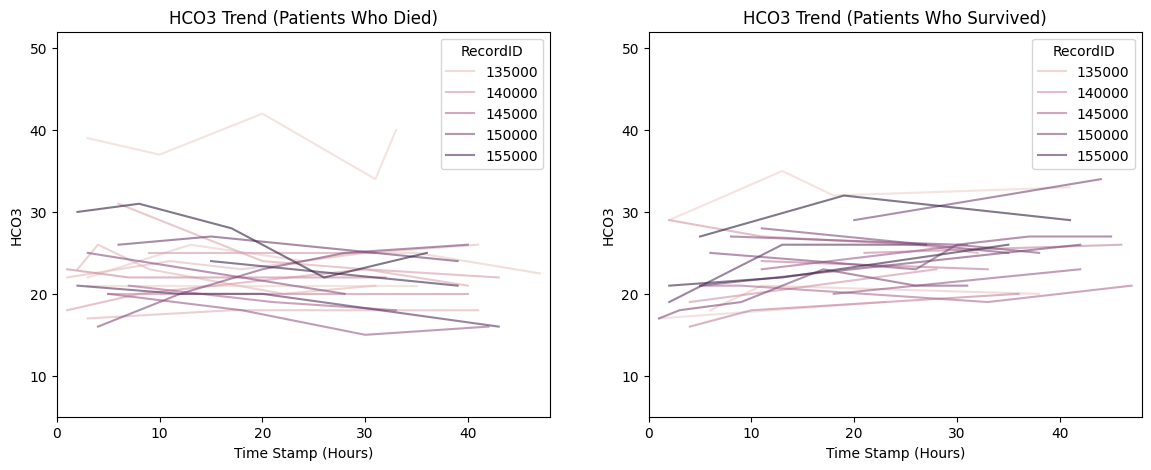

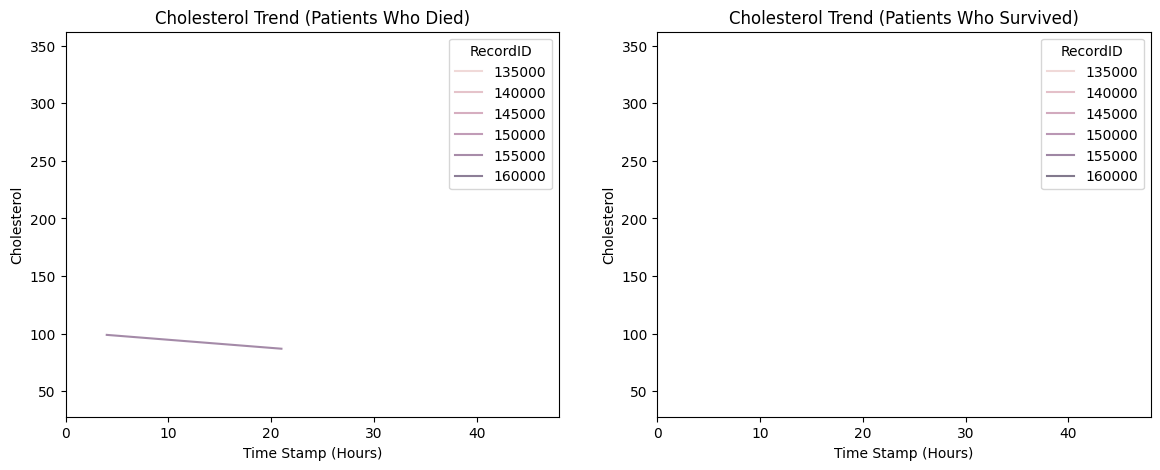

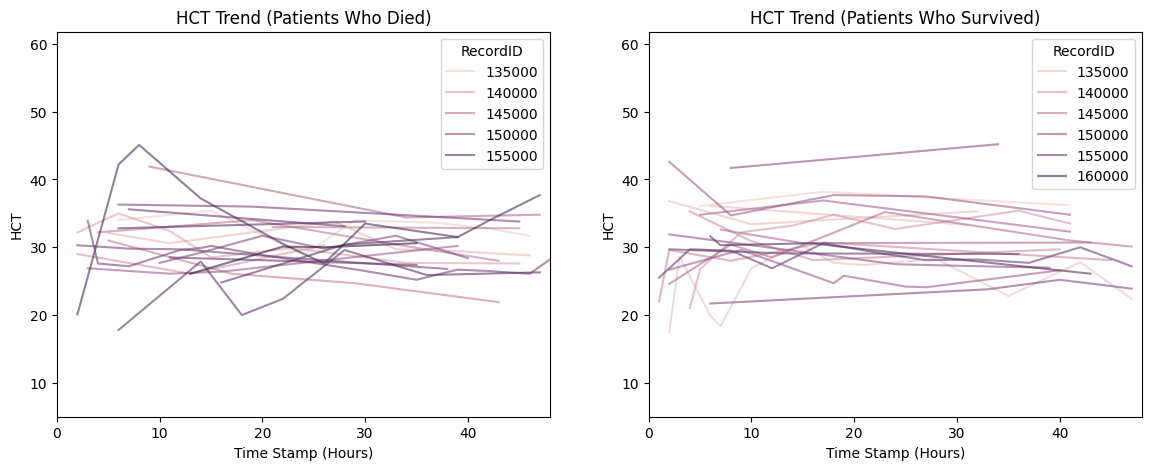

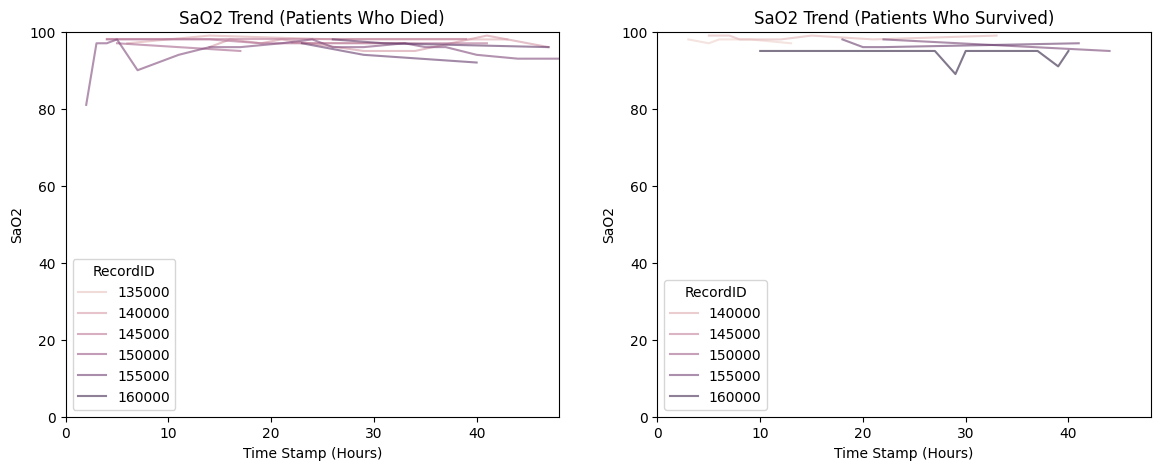

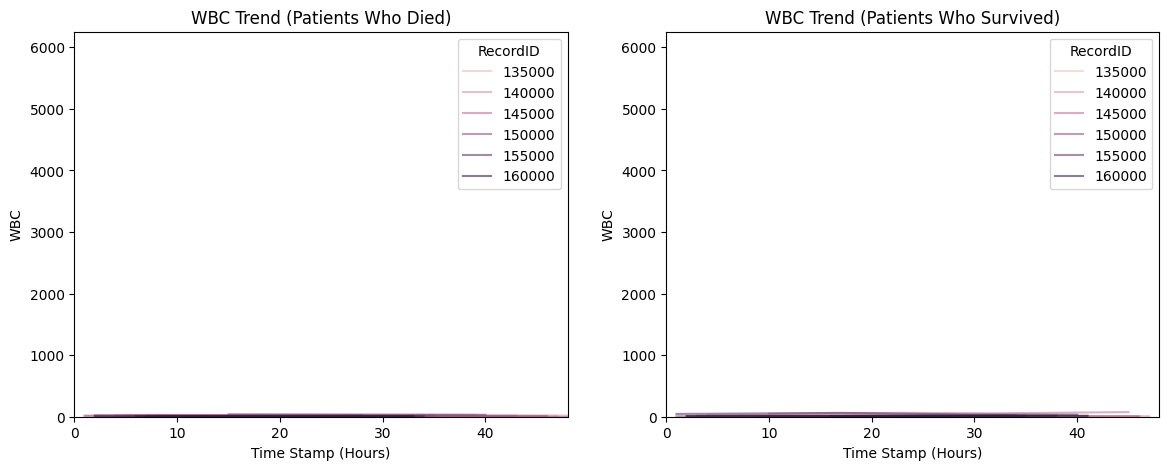

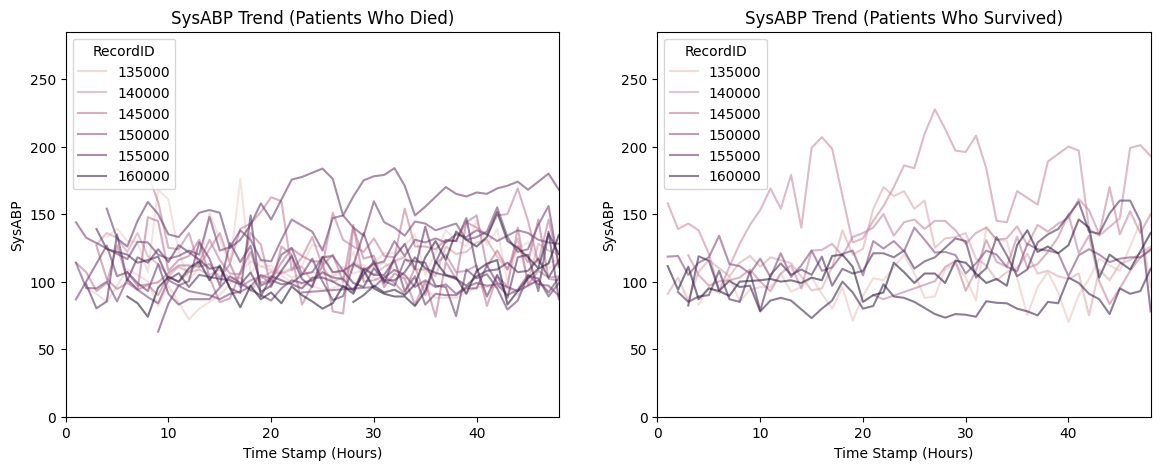

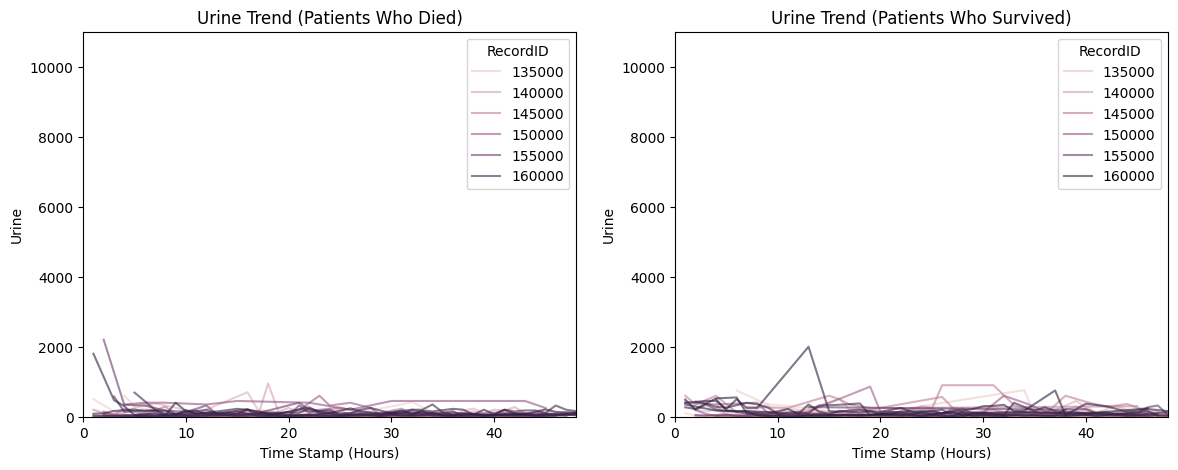

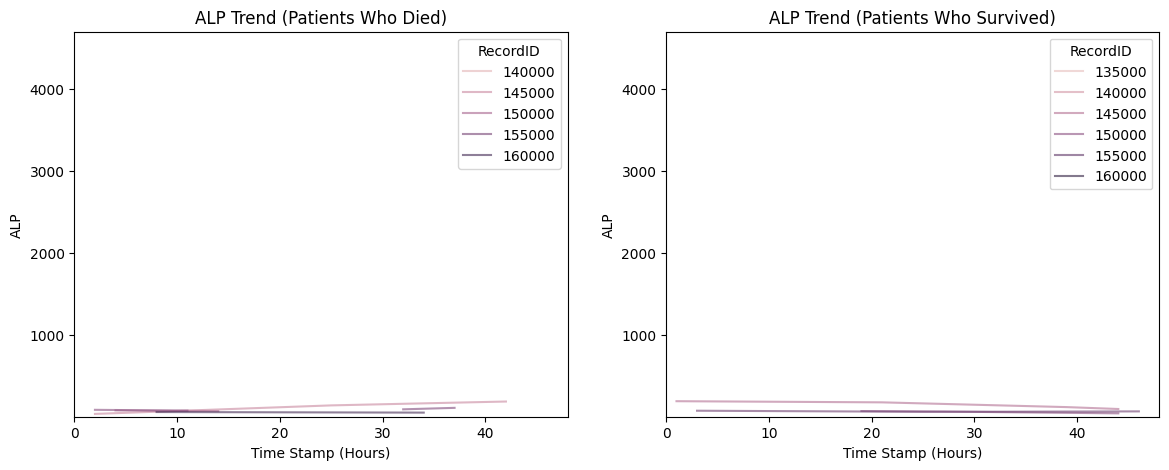

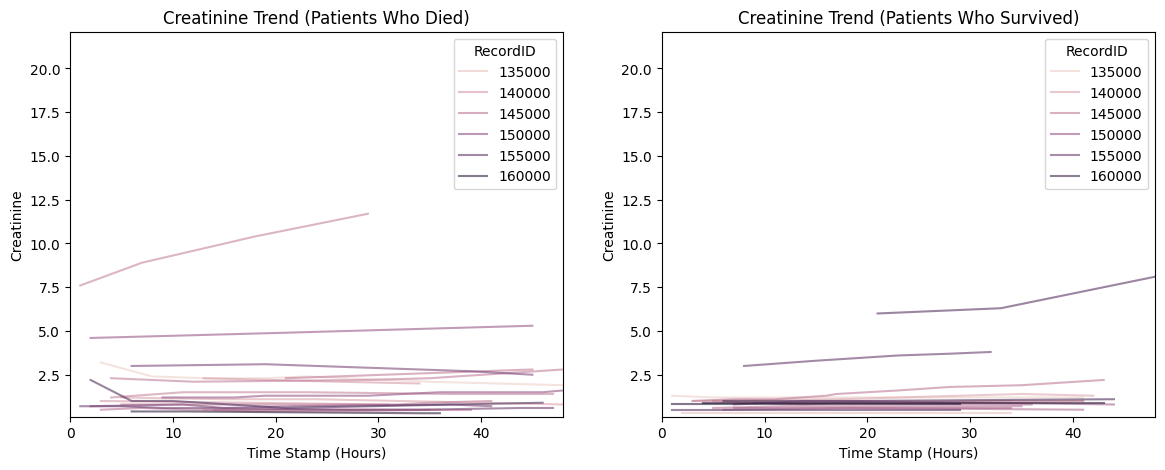

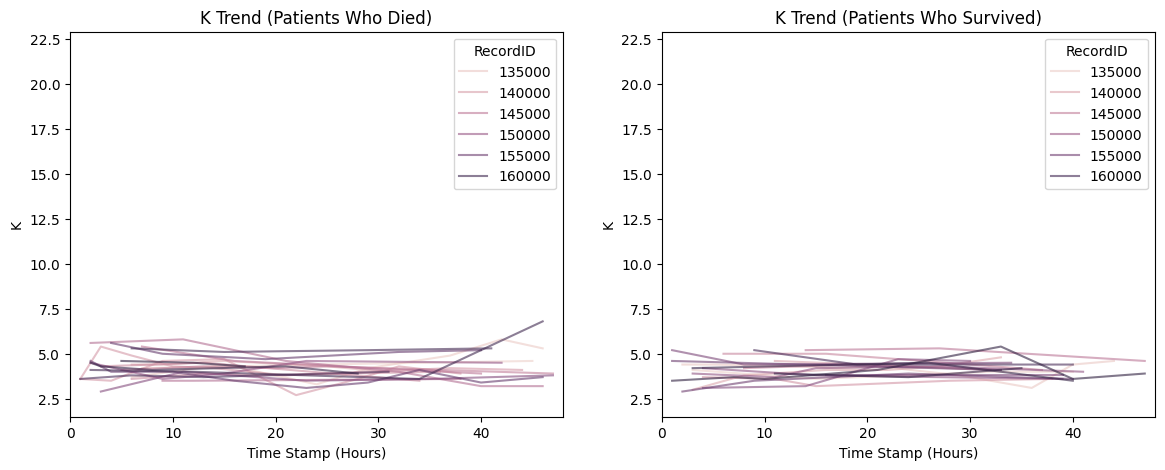

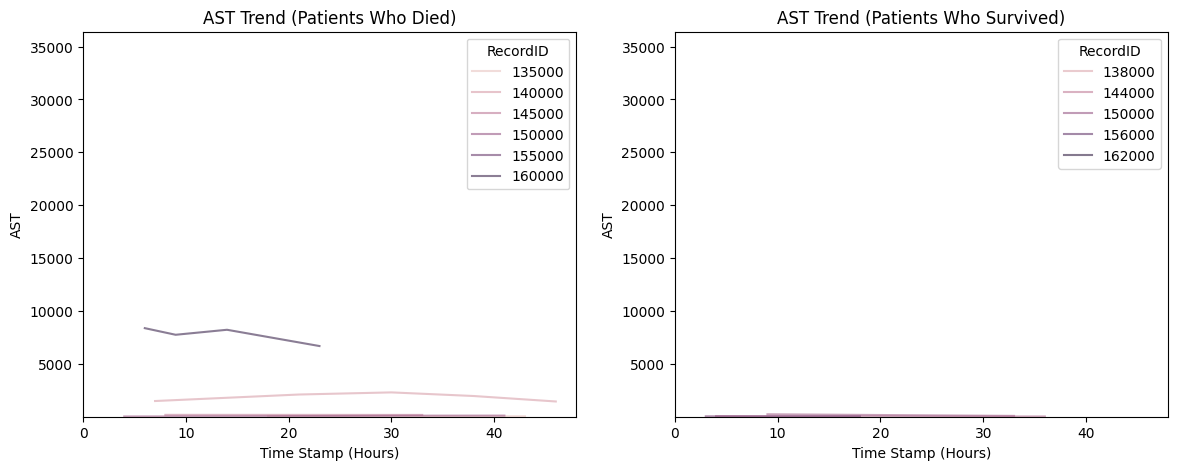

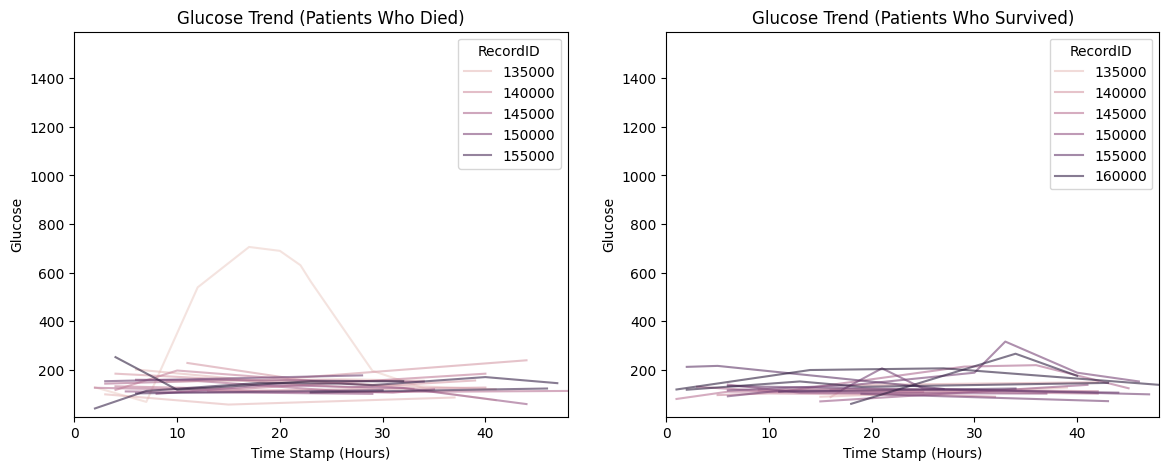

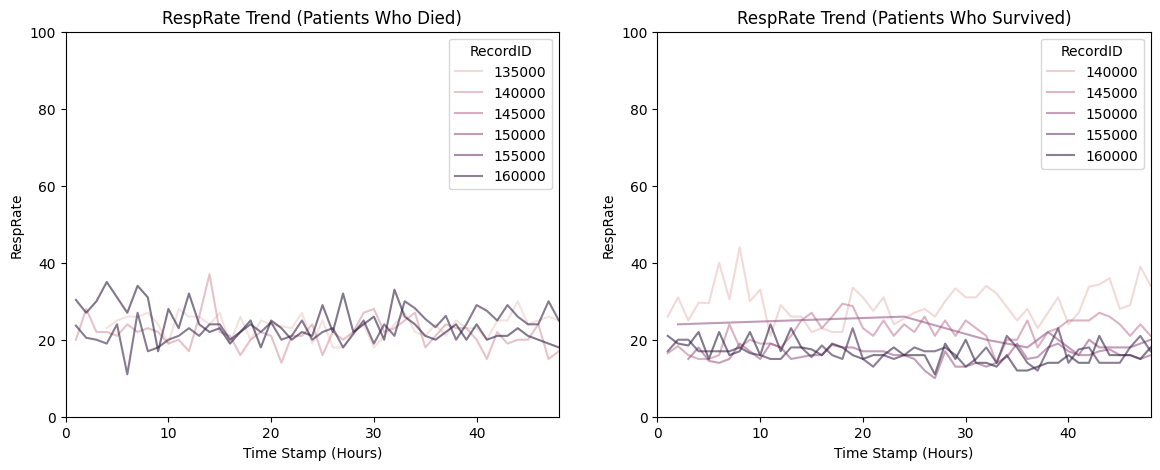

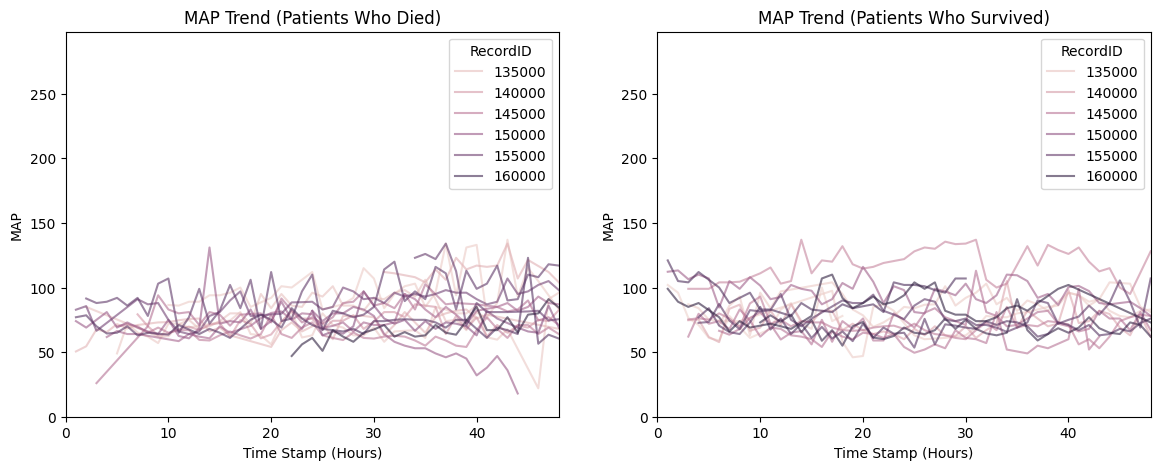

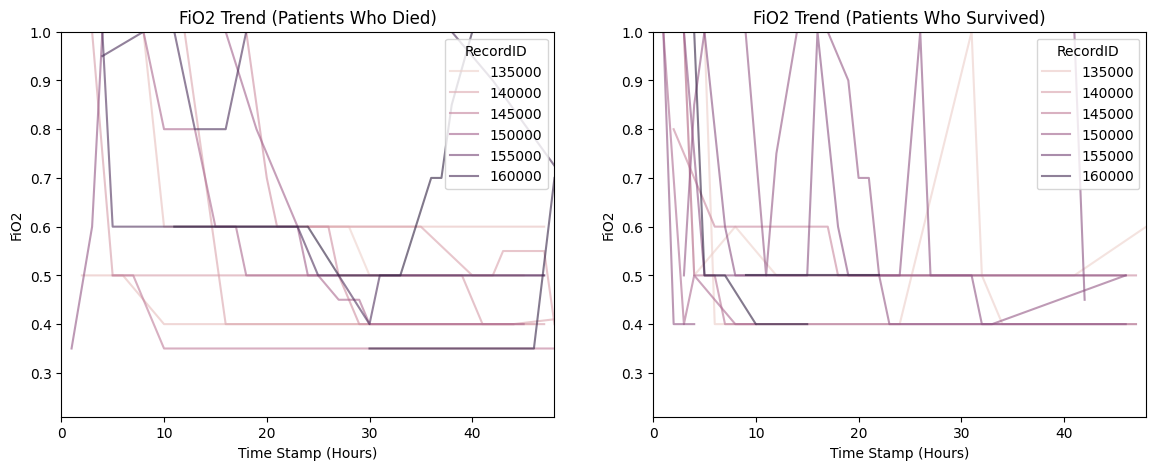

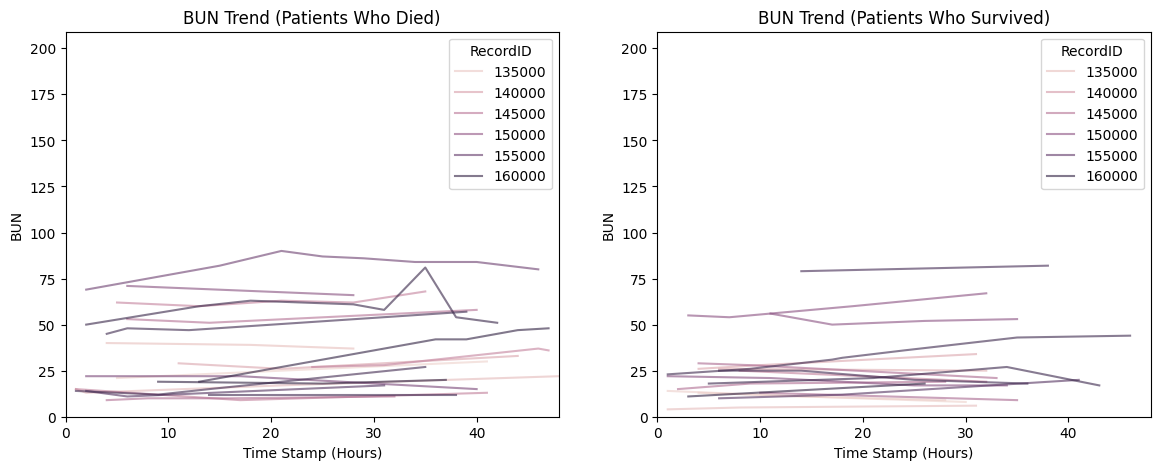

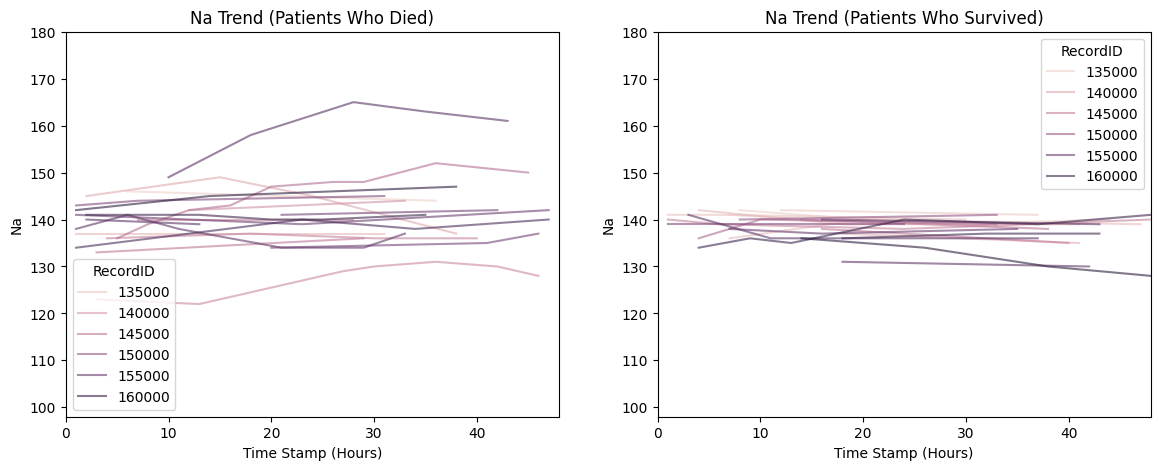

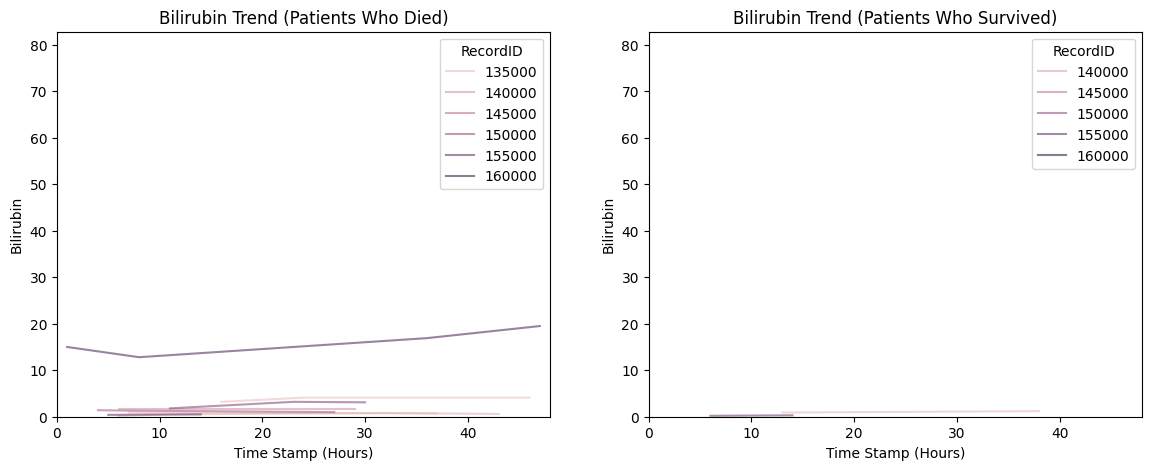

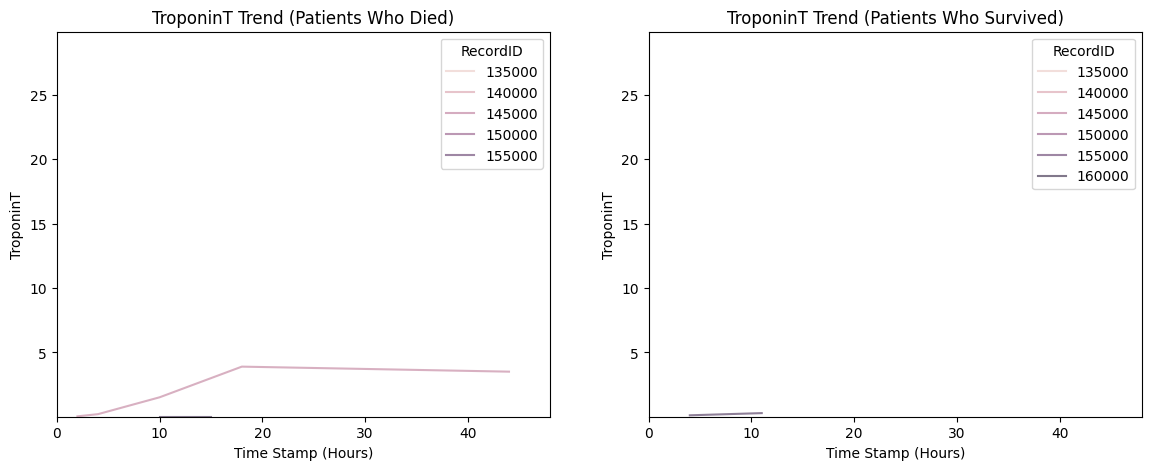

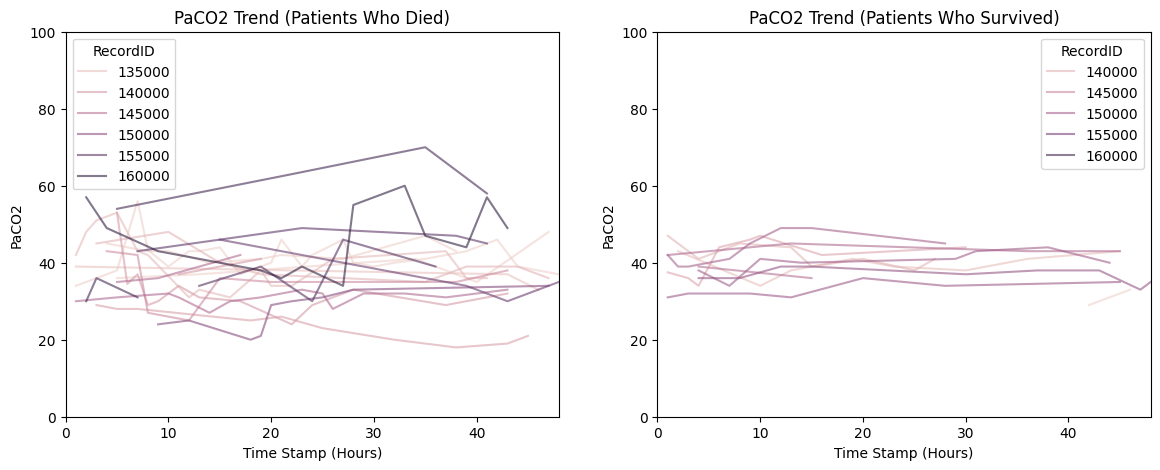

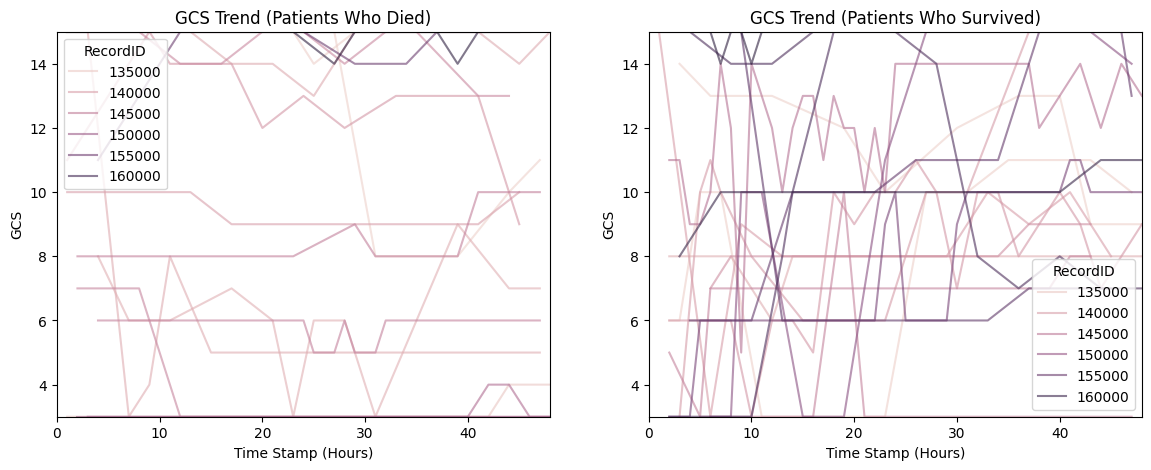

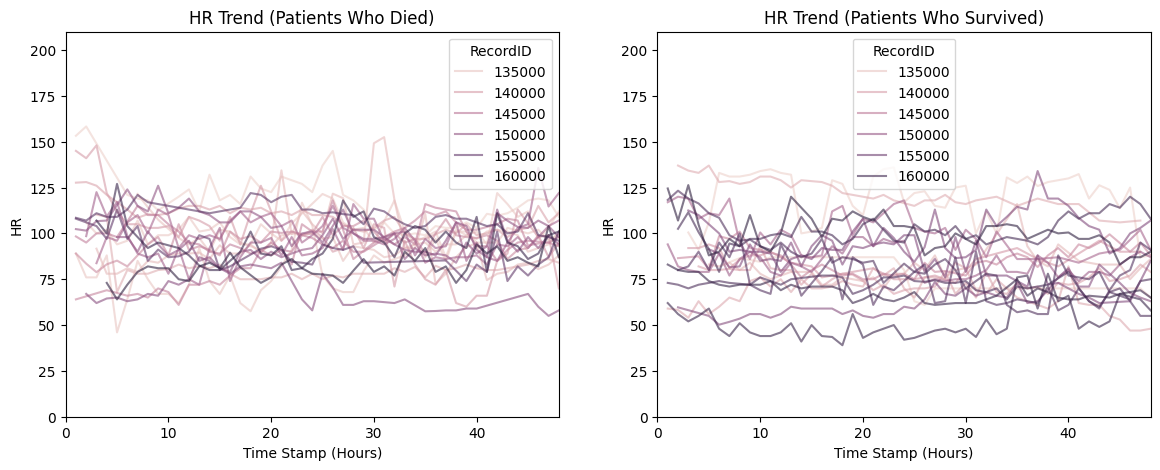

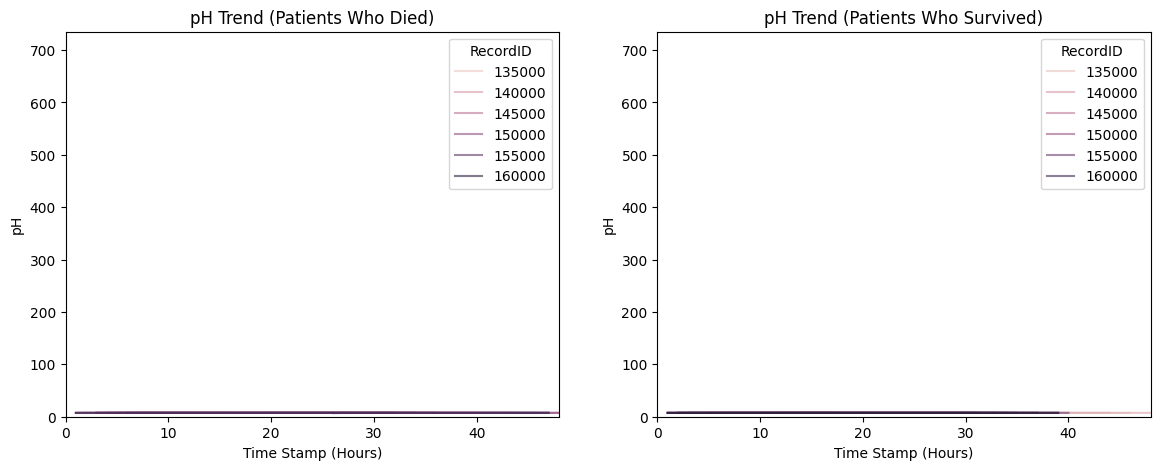

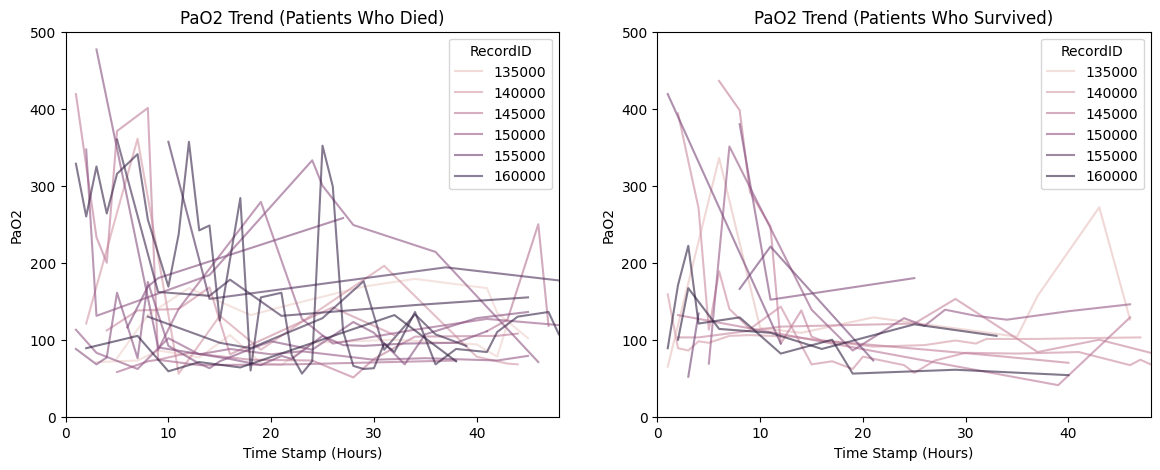

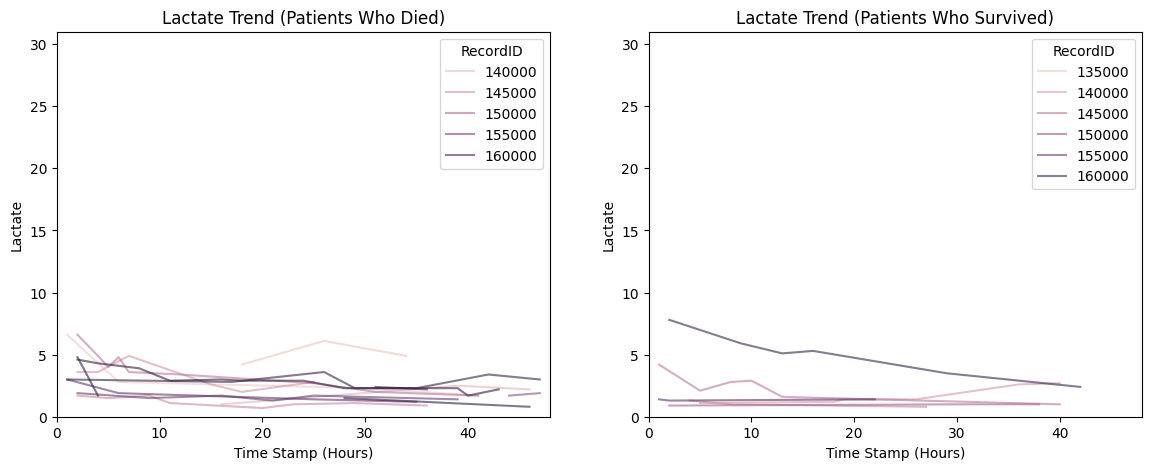

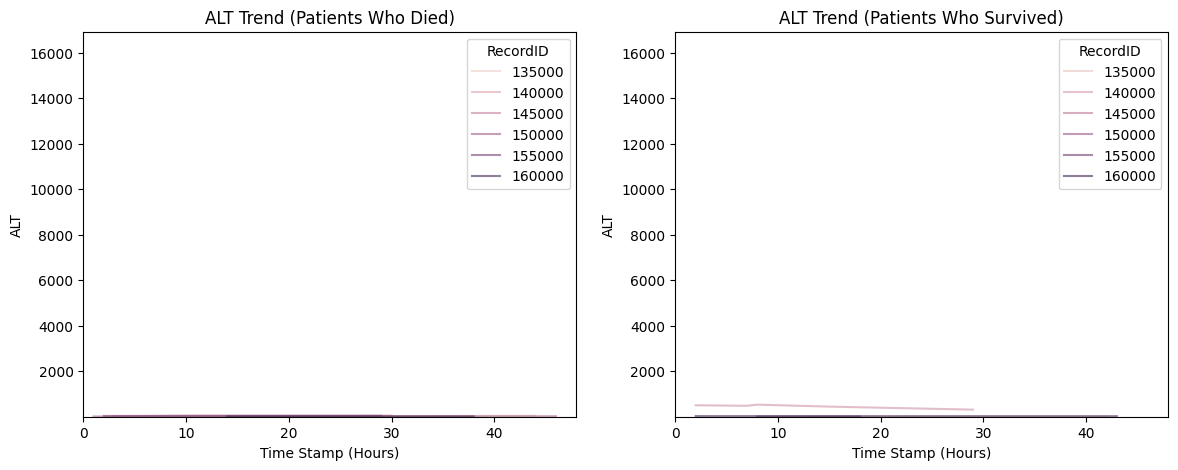

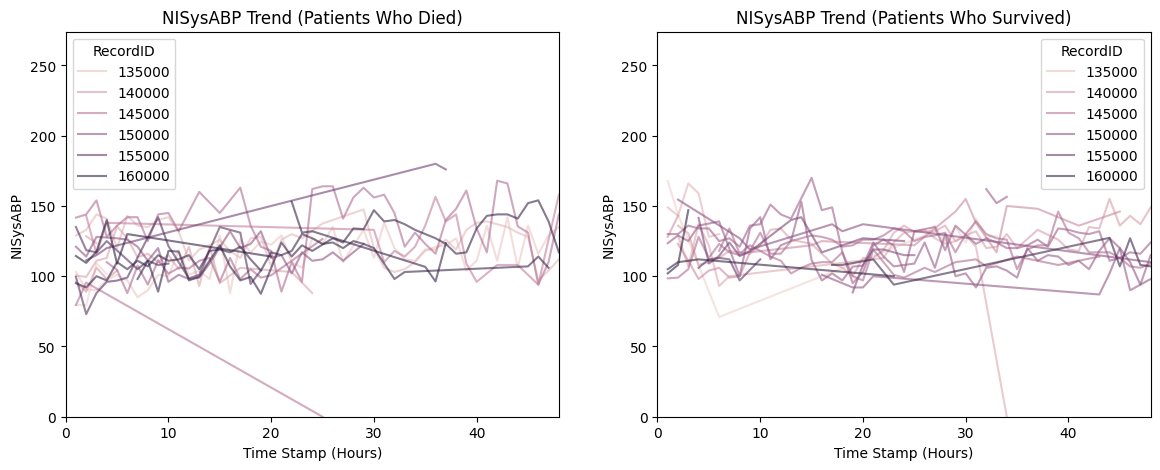

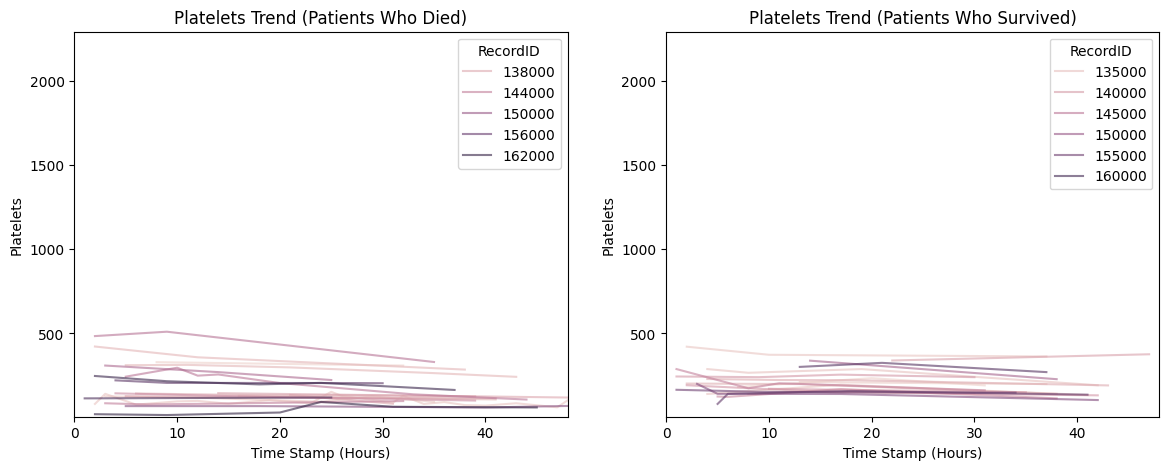

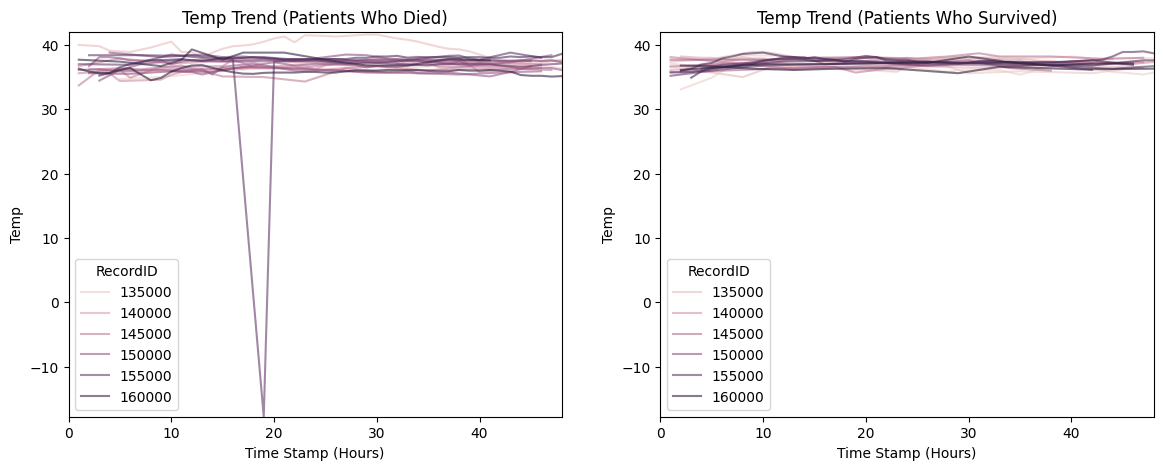

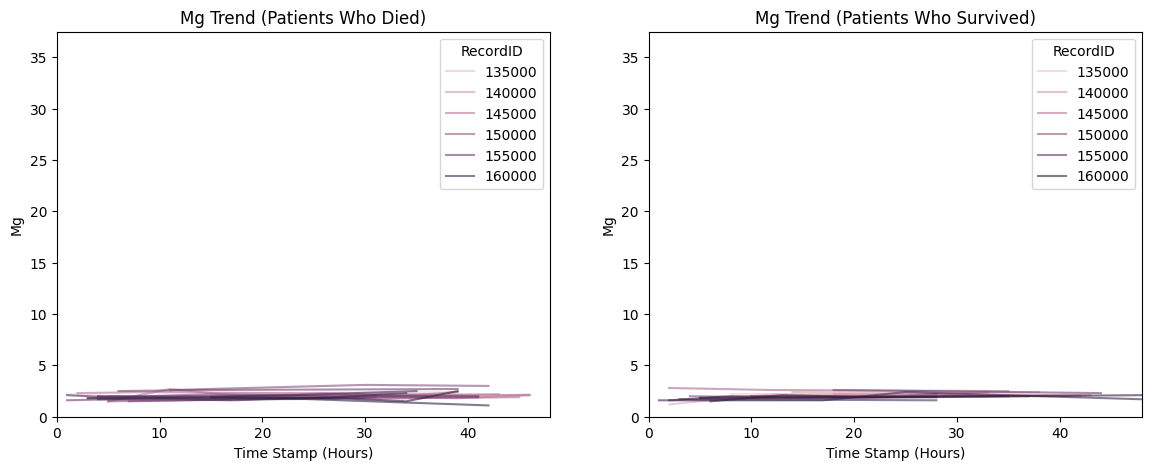

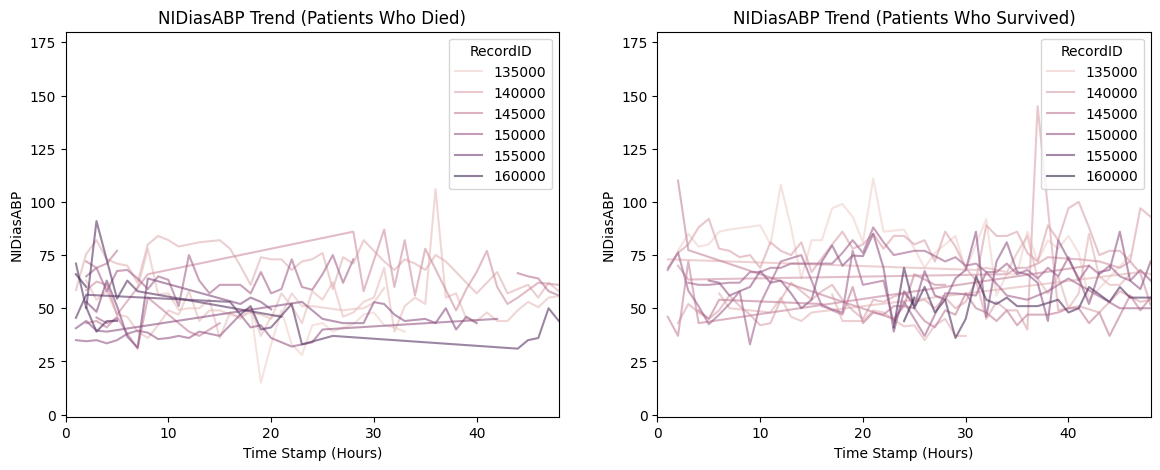

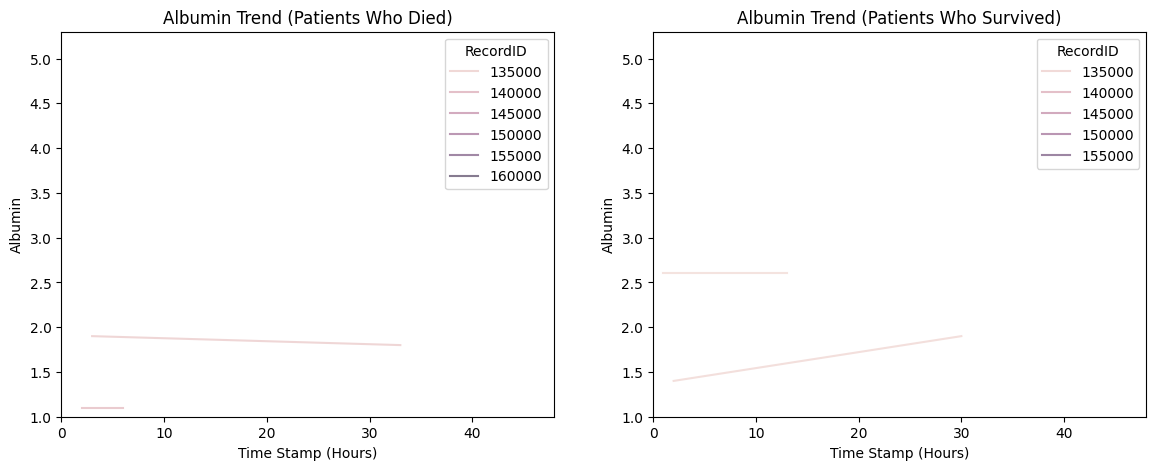

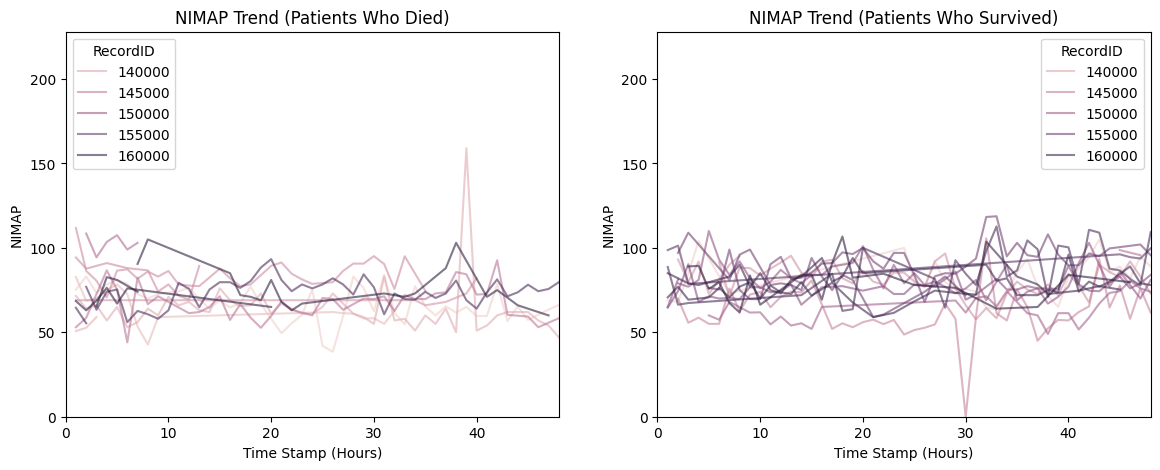

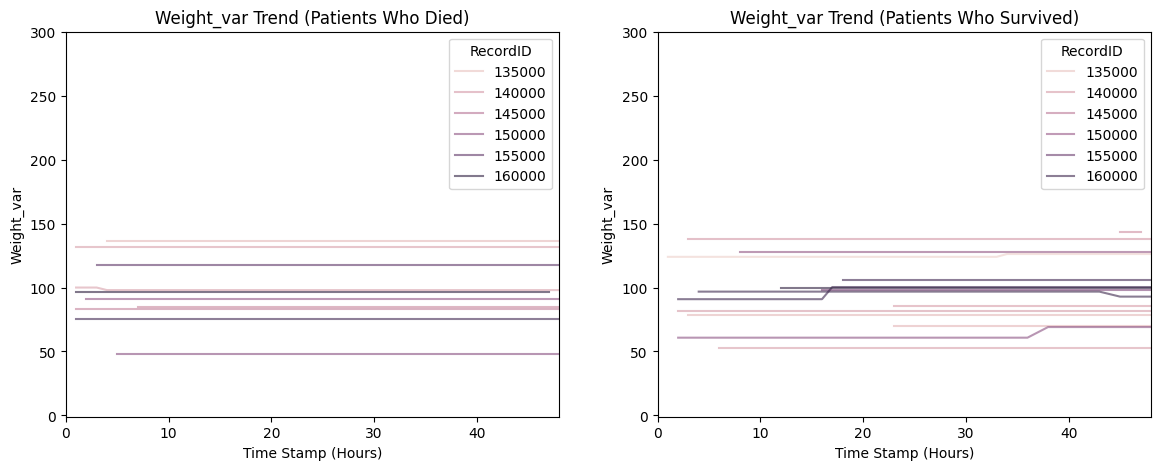

In [20]:
for dyn_var in dyn_variables:
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create two side-by-side plots

    x_min, x_max = df["Timestamp"].min(), df["Timestamp"].max()
    y_min, y_max = df[dyn_var].min(), df[dyn_var].max()

    sample_patients_die = df[df['In-hospital_death']==1]["RecordID"].sample(20)  
    sample_patients_die
    sample_data_die = df[df["RecordID"].isin(sample_patients_die)]

    sample_data_die

    # Line plot of Heart Rate over time for selected patients
    
    sns.lineplot(sample_data_die, x="Timestamp", y=dyn_var, hue="RecordID", alpha=0.6, ax=axes[0])

    axes[0].set_title(f"{dyn_var} Trend (Patients Who Died)")
    axes[0].set_xlabel("Time Stamp (Hours)")
    axes[0].set_ylabel(dyn_var)
    axes[0].set_xlim(x_min, x_max)
    axes[0].set_ylim(y_min, y_max)


    sample_patients_survive = df[df['In-hospital_death']==0]["RecordID"].sample(20)
    sample_data_survive = df[df["RecordID"].isin(sample_patients_survive)]

    plt.subplot(1, 2, 2)
    sns.lineplot(sample_data_survive, x="Timestamp", y=dyn_var, hue="RecordID", alpha=0.6, ax=axes[1])

    axes[1].set_title(f"{dyn_var} Trend (Patients Who Survived)")
    axes[1].set_xlabel("Time Stamp (Hours)")
    axes[1].set_ylabel(dyn_var)
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_ylim(y_min, y_max)


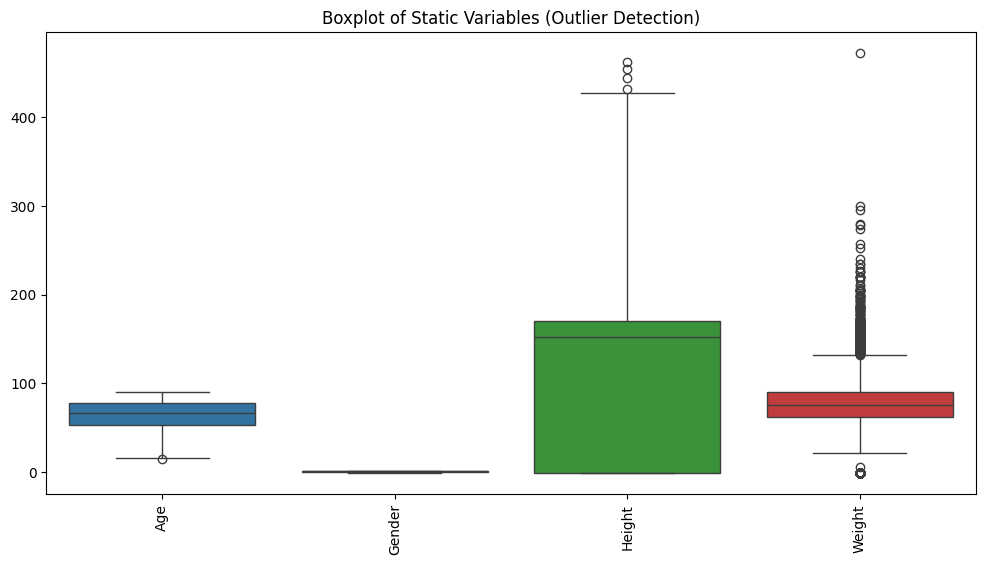

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=static_df.drop(columns=['RecordID', 'In-hospital_death']))
plt.xticks(rotation=90)
plt.title("Boxplot of Static Variables (Outlier Detection)")
plt.show()
